In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-retail-dataset/Online Retail.csv


<h1 style="color:MidnightBlue; opacity: 0.8; font-size:250%; text-align:center; border-radius:7px;">RFM Customer Segmentation & Cohort Analysis</h1>


* [<span style="color:LightCoral"><font size="5">Greeting the Project!</font></span>](#0)


* [<span style="color:LightCoral"><font size="5">About DATA</font></span>](#1)


* [<span style="color:LightCoral"><font size="5">What are We Gonna Do</font></span>](#2)


* [<span style="color:LightCoral"><font size="5">Structure of Work</font></span>](#3)


* [<span style="color:LightCoral"><font size="5">1. Data Cleaning & Exploratory Data Analysis</font></span>](#4)

    - [<span style="color:#9C27B0; opacity:1"><font size="4">1.1 Import Modules, Load Data & Data Review</font></span>](#4.1)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">1.2 Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.</font></span>](#4.2)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">1.3 What does the letter "C" in the invoiceno column mean?</font></span>](#4.3)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">1.4 Handling Missing Values</font></span>](#4.4)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">1.5 Clean the Data from the Noise and Missing Values</font></span>](#4.5)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">1.6 Explore the Orders</font></span>](#4.6)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">1.7 Explore Customers by Country</font></span>](#4.7)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">1.8 Explore the UK Market</font></span>](#4.8)
    

* [<span style="color:LightCoral"><font size="5">2. RFM Analysis</font></span>](#5)

    - [<span style="color:#9C27B0; opacity:1"><font size="4">2.1 What is RFM Analysis and Overview</font></span>](#5.1)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">2.2 Review "df_uk" DataFrame.</font></span>](#5.2)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">2.3 Calculate Recency</font></span>](#5.3)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">2.4 Calculate Frequency</font></span>](#5.4)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">2.5 Calculate Monetary Values</font></span>](#5.5)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">2.6 Create RFM Table</font></span>](#5.6)
        

* [<span style="color:LightCoral"><font size="5">3. Customer Segmentation with RFM Scores</font></span>](#6)

    - [<span style="color:#9C27B0; opacity:1"><font size="4">3.1 Calculate RFM Scoring</font></span>](#6.1)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">3.2 Creating the RFM Segmentation Table.</font></span>](#6.2)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">3.3 Plot RFM Segments</font></span>](#6.3)


* [<span style="color:LightCoral"><font size="5">4. Applying K-Means Clustering</font></span>](#7)

    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.1 Data Pre-Processing and Exploring</font></span>](#7.1)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.2 Define and Plot Feature Correlations</font></span>](#7.2)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.3 Visualize Feature Distributions</font></span>](#7.3)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.4 Data Normalization</font></span>](#7.4)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.5 K-Means Implementation</font></span>](#7.5)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.6 Define Optimal Cluster Number (K) by using "Elbow Method" and "Silhouette Analysis"</font></span>](#7.6)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.7 Visualize the Clusters</font></span>](#7.7)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.8 Assign the label</font></span>](#7.8)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.9 Conclusion</font></span>](#7.9)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">4.10 Discussion</font></span>](#7.10)


* [<span style="color:LightCoral"><font size="5">5. Create Cohort and Conduct Cohort Analysis</font></span>](#8)

    - [<span style="color:#9C27B0; opacity:1"><font size="4">5.1 Future Engineering</font></span>](#8.1)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">5.2 Extract the Month of the Purchase</font></span>](#8.2)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">5.3 Calculating time offset in Months i.e. Cohort Index</font></span>](#8.3)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">5.4 Create 1st Cohort: User Number & Retention Rate</font></span>](#8.4)
        - [<span style="color:#19A4E6; opacity:1"><font size="3">5.4.1 Pivot Cohort and Cohort Retention</font></span>](#8.4.1)
        - [<span style="color:#19A4E6; opacity:1"><font size="3">5.4.2 Visualize analysis of cohort 1 using seaborn and matplotlib"</font></span>](#8.4.2)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">5.5 Create 2nd Cohort: Average Quantity Sold</font></span>](#8.5)
        - [<span style="color:#19A4E6; opacity:1"><font size="3">5.5.1 Pivot Cohort and Cohort Retention</font></span>](#8.5.1)
        - [<span style="color:#19A4E6; opacity:1"><font size="3">5.5.2 Visualize analysis of cohort 2 using seaborn and matplotlib modules </font></span>](#8.5.2)
    - [<span style="color:#9C27B0; opacity:1"><font size="4">5.6 Create 3rd Cohort: Average Sales</font></span>](#8.6)
        - [<span style="color:#19A4E6; opacity:1"><font size="3">5.6.1 Pivot Cohort and Cohort Retention</font></span>](#8.6.1)
        - [<span style="color:#19A4E6; opacity:1"><font size="3">5.6.2 Visualize analysis of cohort 3 using seaborn and matplotlib</font></span>](#8.6.2)
 
 
* [<span style="color:LightCoral"><font size="5">6. Coclusion</font></span>](#9)


* [<span style="color:LightCoral"><font size="5">7. References</font></span>](#10)

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Hello Everyone!</font></span> <a id="0"></a>

Welcome to "RFM Customer Segmentation & Cohort Analysis". 

In this project, I will show you what is RFM and how to apply RFM Analysis and Customer Segmentation using K-Means Clustering. Also, with this project I will show you fundamentals of Data Analysis process such as Data Cleaning, Data Visualization and Exploratory Data Analysis capabilities. And as the name of the project suggests, I will show and create RFM , Cohort and Conduct Cohort Analysis.analysis. 

English and Turkish resources that may be useful to read before starting:
- [CRM Analizi (RFM Analizi ve CLTV (Müşteri Yaşam Boyu Değeri))](https://medium.com/machine-learning-t%C3%BCrkiye/crm-analizi-rfm-analizi-ve-cltv-m%C3%BC%C5%9Fteri-ya%C5%9Fam-boyu-de%C4%9Feri-36e5c3a232b1)
- [RFM analysis for Customer Segmentation](https://clevertap.com/blog/rfm-analysis/)
- [RFM Analysis using BigQuery ML](https://towardsdatascience.com/rfm-analysis-using-bigquery-ml-bfaa51b83086)
- [RFM Analysis: An Effective Customer Segmentation technique using Python](https://medium.com/capillary-data-science/rfm-analysis-an-effective-customer-segmentation-technique-using-python-58804480d232)

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">About Data</font></span> <a id="1"></a>

Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">What Are We Gonna Do</font></span> <a id="2"></a>

First of all, to observe the structure of the data and missing values, you can use exploratory data analysis and data visualization techniques.

You must do descriptive analysis. Because you must understand the relationship of the features to each other and clear the noise and missing values in the data. After that, the data set will be ready for RFM analysis.

Before starting the RFM Analysis, you will be asked to do some analysis regarding the distribution of *Orders*, *Customers* and *Countries*. These analyzes will help the company develop its sales policies and contribute to the correct use of resources.

You will notice that the UK not only has the most sales revenue, but also the most customers. So you will continue to analyze only UK transactions in the next RFM Analysis, Customer Segmentation and K-Means Clustering topics.

Next, you will begin RFM Analysis, a customer segmentation technique based on customers' past purchasing behavior. 

By using RFM Analysis, you can enable companies to develop different approaches to different customer segments so that they can get to know their customers better, observe trends better, and increase customer retention and sales revenues.

You will calculate the Recency, Frequency and Monetary values of the customers in the RFM Analysis you will make using the data consisting of UK transactions. Ultimately, you have to create an RFM table containing these values.

In the Customer Segmentation section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

We will segment the customers ourselves based on their recency, frequency, and monetary values. But can an **unsupervised learning** model do this better for us? You will use the K-Means algorithm to find the answer to this question. Then you will compare the classification made by the algorithm with the classification you have made yourself.

Before applying K-Means Clustering, you should do data pre-processing. In this context, it will be useful to examine feature correlations and distributions. In addition, the data you apply for K-Means should be normalized.

On the other hand, you should inform the K-means algorithm about the number of clusters it will predict. You will also try the *** Elbow method *** and *** Silhouette Analysis *** to find the optimum number of clusters.

After the above operations, you will have made cluster estimation with K-Means. You should visualize the cluster distribution by using a scatter plot. You can observe the properties of the resulting clusters with the help of the boxplot. Thus you will be able to tag clusters and interpret results.

Finally, you will do Cohort Analysis with the data you used at the beginning, regardless of the analysis you have done before. Cohort analysis is a subset of behavioral analytics that takes the user data and breaks them into related groups for analysis. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.


# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">Structure of Work</font></span> <a id="3"></a>

#### - Data Cleaning & Exploratory Data Analysis
#### - RFM Analysis
#### - Customer Segmentation
#### - Applying K-Means Clustering
#### - Create Cohort and Conduct Cohort Analysis

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">1. Data Cleaning and Exploratory Data Analysis</font></span> <a id="4"></a>

## <span style="color:#9C27B0; opacity:1"><font size="5">1.1 Import Modules, Load Data & Data Review</font></span> <a id="4.1"></a>

In [2]:
!pip install missingno
!pip install pyforest
!pip install cufflinks
!pip install termcolor
#!pip install wordcloud
!pip install squarify
!pip install pyclustertend
!pip install yellowbrick --user

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=fee148d4433943f718558a71ba2587ac3537f9e6cf4e36d86259e2d13a70809e
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest


In [3]:
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# makes strings colored
import colorama
from colorama import Fore, Style
from termcolor import colored

import ipywidgets
from ipywidgets import interact

# White grid plots for dark mode users
sns.set_style("whitegrid")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.



In [4]:
# CSV consumes less memory than Excel. --> CSV is generally faster and less complicated when compared to Excel.
#df = pd.read_excel("Online Retail.xlsx")
#df.to_csv('Online Retail.csv') 

In [5]:
# if you don't specified "index_col=0", you can not drop duplicates.
df=pd.read_csv('../input/online-retail-dataset/Online Retail.csv',index_col=0)
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00      2.550   17850.000  United Kingdom  
1  2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
2  2010-12-01 08:26:00      2.750   17850.000  United Kingdom  
3  2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
4  2010-12-01 08:26:00      3.390   17850.000  United Kingdom

In [6]:
## Some Useful Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop realted columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
    
###############################################################################

In [7]:
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

Shape:(541909, 8)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  float64
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(3), object(5)
memory usage: 37.2+ MB
None
-------------------------------------------------------------------------------
Number of Uniques:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64
-----------------

In [8]:
# df_model will be created for further analysis in case of not loosing some information about customer.
df_model = df.copy()

In [9]:
df.isnull().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135037
country             0
dtype: int64

In [10]:
# Now we will drop NanN values of only "customerid" column.
df = df.dropna(subset=['customerid'])
df.shape

(401604, 8)

- Orders which do NOT have customer ID's were not made by the customers already in the dataset because the customers who in fact made some purchases already have ID's.

## <span style="color:#9C27B0; opacity:1"><font size="5">1.2 Take a look at relationships between InvoiceNo, Quantity and UnitPrice columns.</font></span> <a id="4.2"></a>

In [11]:
df[df['quantity'] < 0].shape

(8872, 8)

In [12]:
df["quantity"].min(), df["quantity"].max()

(-80995.0, 80995.0)

In [13]:
df[df['unitprice'] < 0].shape

(0, 8)

In [14]:
df["unitprice"].min(), df["unitprice"].max()

(0.0, 38970.0)

In [15]:
# We did not see any negative value in "unitprice" but we have "zero" values. 
# These are not cancelled ones, because their ID's are not starting with "C" letter.
# High probability these are gifts.
df[(df.unitprice == 0)].shape

(40, 8)

- We see that there are negative values in the Quantity and UnitPrice columns. These are possibly canceled and returned orders. Let's check it out.

In [16]:
df[['unitprice', 'quantity']].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='viridis')

## <span style="color:#9C27B0; opacity:1"><font size="5">1.3 What does the letter "C" in the InvoiceNo column mean?</font></span> <a id="4.3"></a>

In [17]:
df[df['invoiceno'].astype(str).str.startswith('C')]

invoiceno stockcode                       description  quantity  \
141      C536379         D                          Discount    -1.000   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS    -1.000   
235      C536391   22556.0    PLASTERS IN TIN CIRCUS PARADE    -12.000   
236      C536391   21984.0  PACK OF 12 PINK PAISLEY TISSUES    -24.000   
237      C536391   21983.0  PACK OF 12 BLUE PAISLEY TISSUES    -24.000   
...          ...       ...                               ...       ...   
540449   C581490   23144.0   ZINC T-LIGHT HOLDER STARS SMALL   -11.000   
541541   C581499         M                            Manual    -1.000   
541715   C581568   21258.0        VICTORIAN SEWING BOX LARGE    -5.000   
541716   C581569   84978.0  HANGING HEART JAR T-LIGHT HOLDER    -1.000   
541717   C581569   20979.0     36 PENCILS TUBE RED RETROSPOT    -5.000   

                invoicedate  unitprice  customerid         country  
141     2010-12-01 09:41:00     27.500   14527.000  United Kingdom  
154     2010-12-01 09:49:00      4.650   15311.000  United Kingdom  
235     2010-12-01 10:24:00      1.650   17548.000  United Kingdom  
236     2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
237     2010-12-01 10:24:00      0.290   17548.000  United Kingdom  
...                     ...        ...         ...             ...  
540449  2011-12-09 09:57:00      0.830   14397.000  United Kingdom  
541541  2011-12-09 10:28:00    224.690   15498.000  United Kingdom  
541715  2011-12-09 11:57:00     10.950   15311.000  United Kingdom  
541716  2011-12-09 11:58:00      1.250   17315.000  United Kingdom  
541717  2011-12-09 11:58:00      1.250   17315.000  United Kingdom  

[8872 rows x 8 columns]

- If the invoice number starts with the letter "C", it means the order was cancelled. 

In [18]:
df["invoiceno"].str.startswith('C').value_counts()

False    392732
True       8872
Name: invoiceno, dtype: int64

In [19]:
df["invoiceno"].str.startswith('C').value_counts(normalize=True)*100

False   97.791
True     2.209
Name: invoiceno, dtype: float64

In [20]:
df[df["invoiceno"].str.startswith('C')] [["invoiceno","quantity", "unitprice"]]

invoiceno  quantity  unitprice
141      C536379    -1.000     27.500
154      C536383    -1.000      4.650
235      C536391   -12.000      1.650
236      C536391   -24.000      0.290
237      C536391   -24.000      0.290
...          ...       ...        ...
540449   C581490   -11.000      0.830
541541   C581499    -1.000    224.690
541715   C581568    -5.000     10.950
541716   C581569    -1.000      1.250
541717   C581569    -5.000      1.250

[8872 rows x 3 columns]

In [21]:
df[df["invoiceno"].str.startswith('C')] [["invoiceno","quantity", "unitprice"]].describe()

quantity  unitprice
count   8872.000   8872.000
mean     -30.775     18.900
std     1172.250    445.191
min   -80995.000      0.010
25%       -6.000      1.450
50%       -2.000      2.950
75%       -1.000      4.950
max       -1.000  38970.000

- Let's do some analysis between cancelled/non-cancelled orders and quantity.

In [22]:
df['cancelled'] = df['invoiceno'].str.contains('C')
df.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

           invoicedate  unitprice  customerid         country  cancelled  
0  2010-12-01 08:26:00      2.550   17850.000  United Kingdom      False  
1  2010-12-01 08:26:00      3.390   17850.000  United Kingdom      False  
2  2010-12-01 08:26:00      2.750   17850.000  United Kingdom      False  
3  2010-12-01 08:26:00      3.390   17850.000  United Kingdom      False  
4  2010-12-01 08:26:00      3.390   17850.000  United Kingdom      False

In [23]:
df['cancelled'].value_counts()

False    392732
True       8872
Name: cancelled, dtype: int64

In [24]:
# Let's replace the True's to 1 and False's to 0.
# df['cancelled'] = df["cancelled"].replace('True',1).replace('False',0) --> This is not working
df['cancelled'] = df['cancelled']*1
df['cancelled'].value_counts()

0    392732
1      8872
Name: cancelled, dtype: int64

- canceled orders by Quantity > 0

In [25]:
df[(df.cancelled == 1) & (df.quantity > 0)]   # returns us nothing

Empty DataFrame
Columns: [invoiceno, stockcode, description, quantity, invoicedate, unitprice, customerid, country, cancelled]
Index: []

- non-canceled orders by Quantity < 0

In [26]:
df[(df.cancelled == 0) & (df.quantity < 0)]   # returns us nothing

Empty DataFrame
Columns: [invoiceno, stockcode, description, quantity, invoicedate, unitprice, customerid, country, cancelled]
Index: []

- When we filter canceled orders by Quantity > 0, or non-cancelled orders by Quantity <0 we get empty output.
- These confirm that; negative values indicate the order has been cancelled. 
<br>So lets find out how many orders were cancelled?

In [27]:
df['cancelled'].value_counts()  # 1 --> cancelled based on our tortured dataset (8872)

0    392732
1      8872
Name: cancelled, dtype: int64

In [28]:
df_original = pd.read_csv('../input/online-retail-dataset/Online Retail.csv',index_col=0)  # True --> cancelled based on our original dataset (9288)
df_original["InvoiceNo"].str.startswith('C').value_counts()

False    532621
True       9288
Name: InvoiceNo, dtype: int64

In [29]:
9288 / len(df_original)

0.017139409015166755

In [30]:
8872/len(df)

0.02209141343213713

In [31]:
# nunique(): returns number of unique elements in the specified column. It excludes NaN values by default.
# Don’t include NaN in the count.
df[df.cancelled == 1]['customerid'].nunique() / df['customerid'].nunique()  # ratio obtained based on our tortured dataset 

0.3634492223238792

In [32]:
# ratio obtained based on our original dataset 
df_original[df_original["InvoiceNo"].str.startswith('C')]['CustomerID'].nunique() / df_original['CustomerID'].nunique()

0.3634492223238792

In [33]:
# We will not use cancelled column again
df = df.drop(['cancelled'],axis=1)

- 9288 or 1.7% (Original dataset) / 8872 or 2% (Tortured dataset) orders were cancelled.  
- 36% --> cancelled and at the same time ["customerid"].nunique() ratio 
- Looking deeper into why these orders were cancelled may prevent future cancellations. Now let's find out what a negative UnitPrice means.


## <span style="color:#9C27B0; opacity:1"><font size="5">1.4 Handling Missing Values</font></span> <a id="4.4"></a>

In [34]:
df.shape

(401604, 8)

In [35]:
missing_values(df)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

- Let's assume that the orders which do NOT have customer ID's were not made by the customers already in the dataset because the customers who in fact made some purchases already have ID's.
- So we don't want to assign these orders to those customers because this would alter the insights we draw from the data.


In [36]:
df = df.dropna(subset=['customerid'])  # we already did at the beginning

## <span style="color:#9C27B0; opacity:1"><font size="5">1.5 Clean the Data from the Noise and Missing Values</font></span> <a id="4.5"></a>

In [37]:
# So, with this operation, lines containing canceled orders are dropped.
df = df[(df.quantity > 0) & (df.unitprice > 0)]
df.shape

(392692, 8)

## <span style="color:#9C27B0; opacity:1"><font size="5">1.6 Explore the Orders</font></span> <a id="4.6"></a>

1. Find the unique number of InvoiceNo  per customer

In [38]:
df.groupby('customerid')['invoiceno'].nunique()

customerid
12346.000     1
12347.000     7
12348.000     4
12349.000     1
12350.000     1
             ..
18280.000     1
18281.000     1
18282.000     2
18283.000    16
18287.000     3
Name: invoiceno, Length: 4338, dtype: int64

2. What's the average number of unqiue items per order or per customer?

- *1.Way (Detailed)*

In [39]:
# This code gives us very good insight but very detailed information. 
# In the next lines we get a more general and understandable output. 
# There is no difference between including the 'invoiceno' column or not. It's just a matter of details.
df.groupby(['customerid', "invoiceno", 'stockcode', 'description'])['quantity'].mean() # Length: 387843

customerid  invoiceno  stockcode  description                        
12346.000   541431.0   23166.0    MEDIUM CERAMIC TOP STORAGE JAR        74215.000
12347.000   537626.0   20780.0    BLACK EAR MUFF HEADPHONES                12.000
                       20782.0    CAMOUFLAGE EAR MUFF HEADPHONES            6.000
                       21064.0    BOOM BOX SPEAKER BOYS                     6.000
                       21171.0    BATHROOM METAL SIGN                      12.000
                                                                           ...   
18287.000   570715.0   85039B     S/4 IVORY MINI ROSE CANDLE IN BOWL       48.000
                       85173.0    SET/6 FROG PRINCE T-LIGHT CANDLES        48.000
            573167.0   21014.0    SWISS CHALET TREE DECORATION             24.000
                       21824.0    PAINTED METAL STAR WITH HOLLY BELLS      48.000
                       23264.0    SET OF 3 WOODEN SLEIGH DECORATIONS       36.000
Name: quantity, Length: 3878

In [40]:
df.groupby(['customerid', "invoiceno", 'stockcode'])['quantity'].mean()  # Length: 387841 --> So 2 different descriptions written

customerid  invoiceno  stockcode
12346.000   541431.0   23166.0     74215.000
12347.000   537626.0   20780.0        12.000
                       20782.0         6.000
                       21064.0         6.000
                       21171.0        12.000
                                      ...   
18287.000   570715.0   85039B         48.000
                       85173.0        48.000
            573167.0   21014.0        24.000
                       21824.0        48.000
                       23264.0        36.000
Name: quantity, Length: 387841, dtype: float64

- *2.Way(More General)*

In [41]:
df.groupby(['customerid', 'stockcode'])['quantity'].mean()

customerid  stockcode
12346.000   23166.0     74215.000
12347.000   16008.0        24.000
            17021.0        36.000
            20665.0         6.000
            20719.0        10.000
                           ...   
18287.000   84920.0         4.000
            85039A         48.000
            85039B         40.000
            85040A         24.000
            85173.0        48.000
Name: quantity, Length: 266792, dtype: float64

In [42]:
df.groupby(['invoiceno', 'stockcode'])['quantity'].mean()

invoiceno  stockcode
536365.0   21730.0     6.000
           22752.0     2.000
           71053.0     6.000
           84029E      6.000
           84029G      6.000
                        ... 
581587.0   22730.0     4.000
           22899.0     6.000
           23254.0     4.000
           23255.0     4.000
           23256.0     4.000
Name: quantity, Length: 387841, dtype: float64

3. Let's see how this compares to the number of unique products per customer.

- *1.Way (Detailed)*

In [43]:
# This code gives us very good insight but very detailed information. 
# In the next line we get a more general and understandable output. 
# There is no difference between including the 'invoiceno' column or not. It's just a matter of details.
df.groupby(['customerid', 'invoiceno', 'stockcode'])['quantity'].sum()

customerid  invoiceno  stockcode
12346.000   541431.0   23166.0     74215.000
12347.000   537626.0   20780.0        12.000
                       20782.0         6.000
                       21064.0         6.000
                       21171.0        12.000
                                      ...   
18287.000   570715.0   85039B         48.000
                       85173.0        48.000
            573167.0   21014.0        24.000
                       21824.0        48.000
                       23264.0        36.000
Name: quantity, Length: 387841, dtype: float64

- *2.Way(More General)*

In [44]:
df.groupby(['customerid', 'stockcode'])['quantity'].sum()

customerid  stockcode
12346.000   23166.0     74215.000
12347.000   16008.0        24.000
            17021.0        36.000
            20665.0         6.000
            20719.0        40.000
                           ...   
18287.000   84920.0         4.000
            85039A         96.000
            85039B        120.000
            85040A         48.000
            85173.0        48.000
Name: quantity, Length: 266792, dtype: float64

## <span style="color:#9C27B0; opacity:1"><font size="5">1.7 Explore Customers by Country</font></span> <a id="4.7"></a>

1. What's the total revenue per country?

- *Revenue means total price.*
- *Total Price = Quantity X Unit Price*

In [45]:
# The calculation of total price or aka. revenue. 
df['total_price'] = df['quantity'] * df['unitprice']

In [46]:
df.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

           invoicedate  unitprice  customerid         country  total_price  
0  2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300  
1  2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340  
2  2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000  
3  2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340  
4  2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340

In [47]:
# It was a very confusing outcome. Let's sort it out and get a nicer insight in the next line.
df.groupby('country')[["total_price"]].sum().sort_values(by="total_price", ascending=False)

total_price
country                          
United Kingdom        7285024.644
Netherlands            285446.340
EIRE                   265262.460
Germany                228678.400
France                 208934.310
Australia              138453.810
Spain                   61558.560
Switzerland             56443.950
Belgium                 41196.340
Sweden                  38367.830
Japan                   37416.370
Norway                  36165.440
Portugal                33375.840
Finland                 22546.080
Singapore               21279.290
Channel Islands         20440.540
Denmark                 18955.340
Italy                   17483.240
Cyprus                  13502.850
Austria                 10198.680
Poland                   7334.650
Israel                   7215.840
Greece                   4760.520
Iceland                  4310.000
Canada                   3666.380
USA                      3580.390
Malta                    2725.590
Unspecified              2660.770
United Arab Emirates     1902.280
Lebanon                  1693.880
Lithuania                1661.060
European Community       1300.250
Brazil                   1143.600
RSA                      1002.310
Czech Republic            826.740
Bahrain                   548.400
Saudi Arabia              145.920

In [48]:
round(df.groupby('country')["total_price"].sum().sort_values(ascending=False),3)

country
United Kingdom         7285024.644
Netherlands             285446.340
EIRE                    265262.460
Germany                 228678.400
France                  208934.310
Australia               138453.810
Spain                    61558.560
Switzerland              56443.950
Belgium                  41196.340
Sweden                   38367.830
Japan                    37416.370
Norway                   36165.440
Portugal                 33375.840
Finland                  22546.080
Singapore                21279.290
Channel Islands          20440.540
Denmark                  18955.340
Italy                    17483.240
Cyprus                   13502.850
Austria                  10198.680
Poland                    7334.650
Israel                    7215.840
Greece                    4760.520
Iceland                   4310.000
Canada                    3666.380
USA                       3580.390
Malta                     2725.590
Unspecified               2660.770
United Arab 

2. Visualize number of customer per country

In [49]:
# First let's check how many unique customerid I have
df["customerid"].nunique()

4338

In [50]:
# Hmm! But when I check again while grouping by countries, a different result comes out.
# To understand what's that difference, read the next line.
df.groupby('country')["customerid"].nunique().sum()

4346

In [51]:
df.groupby('customerid')['country'].nunique().value_counts()

1    4330
2       8
Name: country, dtype: int64

We have 4338 unique "customerid". But when we are grouping them using with contry column; Our unique number of customers is increasing. <br>It means some "customerid" (totally 8) are included in multiple country names. For ex: *'12431.0'*

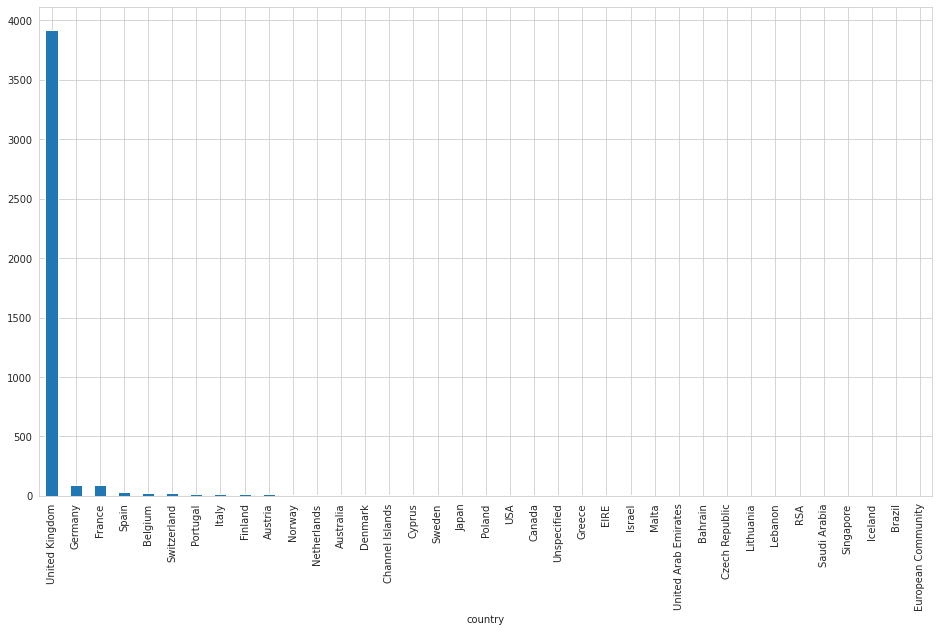

In [52]:
# MATPLOTLIB
plt.figure(figsize=(16,9))
df.groupby('country')["customerid"].nunique().sort_values(ascending=False).plot.bar();

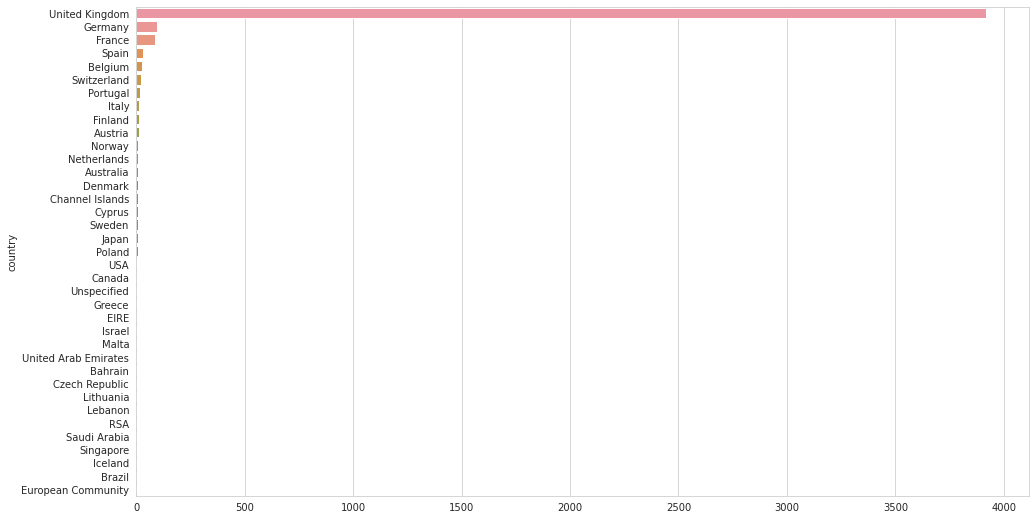

In [53]:
# SEABORN
plt.figure(figsize=(16,9))
sns.barplot(y = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).index, 
            x = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).values);

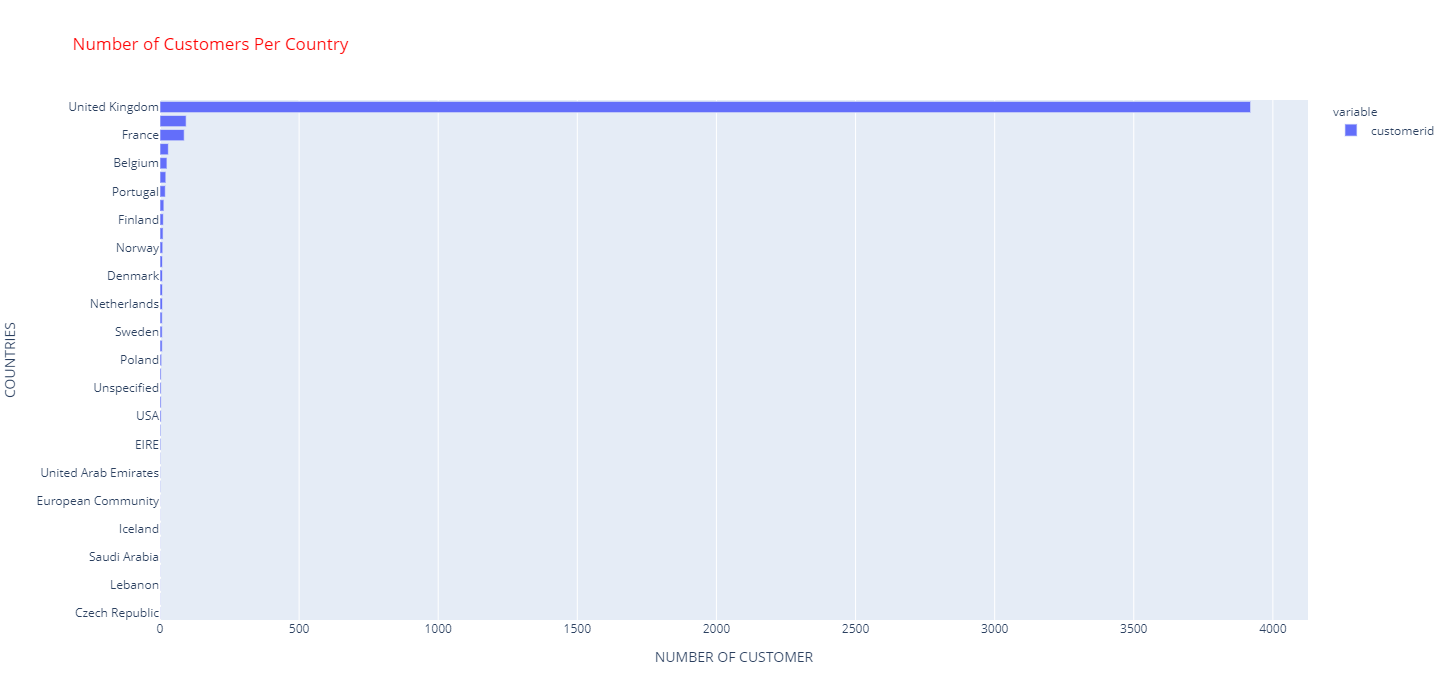

<Figure size 1152x648 with 0 Axes>

In [54]:
# PLOTLY BAR PLOT
import plotly.express as px
plt.figure(figsize = (16,9))
fig = px.bar(df.groupby('country')["customerid"].nunique().sort_values(ascending=False),
             x = ['customerid'], 
             y = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).index,
             title="Number of Customers Per Country")
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(xaxis_title="NUMBER OF CUSTOMER",yaxis_title="COUNTRIES", autosize=False, width=1400, height=700, title_font_color="red",)
fig.show()

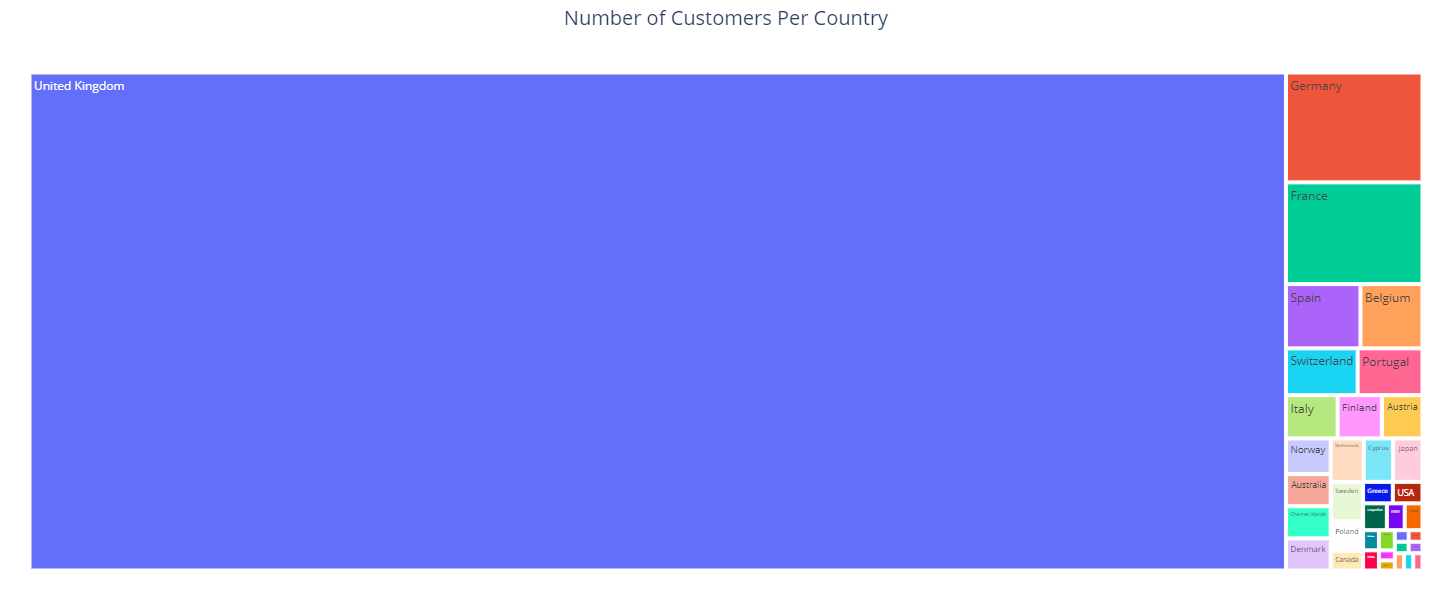

In [55]:
# PLOTLY TREEMAP
fig = px.treemap(df.groupby('country')[["customerid"]].nunique().sort_values(by="customerid", ascending=False),
                 path=[df.groupby('country')[["customerid"]].nunique().sort_values(by="customerid", ascending=False).index], 
                 values='customerid', 
                 width=1000, 
                 height=600)
fig.update_layout(title_text='Number of Customers Per Country',
                  title_x = 0.5, title_font = dict(size=20)
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

- Let's see what our total unique number of customers graph would look like if we didn't include United Kingdom.

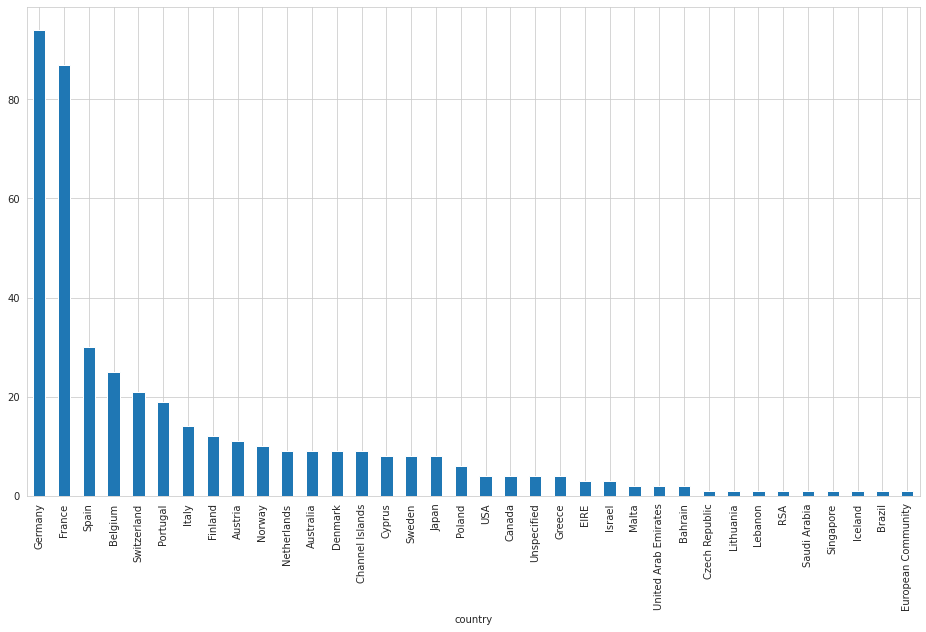

In [56]:
# MATPLOTLIB
plt.figure(figsize=(16,9))
sns.set_style("whitegrid")
df.groupby('country')["customerid"].nunique().sort_values(ascending=False).iloc[1:].plot.bar();

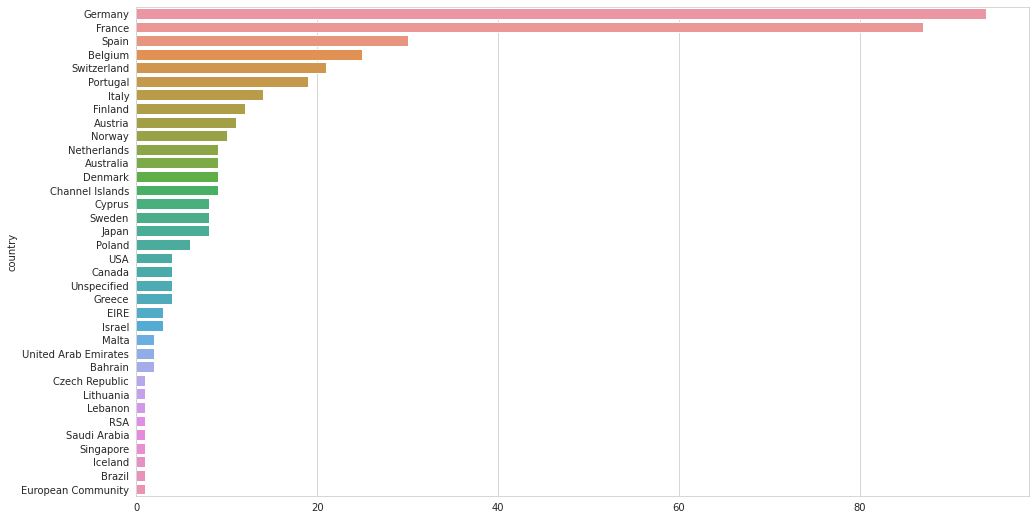

In [57]:
# SEABORN
plt.figure(figsize=(16,9))
sns.barplot(y = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).iloc[1:].index, 
            x = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).iloc[1:].values);

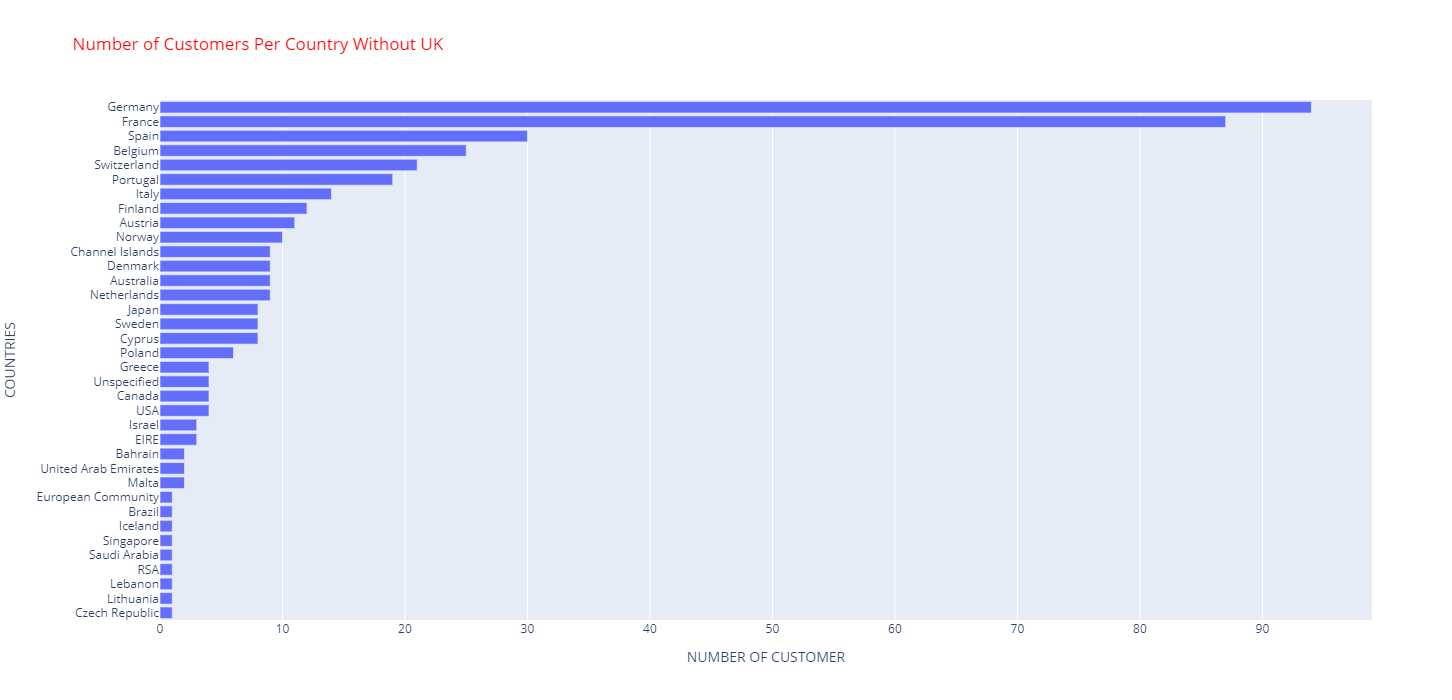

<Figure size 1152x648 with 0 Axes>

In [58]:
# PLOTLY BAR PLOT
import plotly.express as px
plt.figure(figsize = (16,9))
fig = px.bar(df.groupby('country')["customerid"].nunique().sort_values(ascending=False),
             x = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).iloc[1:], 
             y = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).iloc[1:].index,
             title="Number of Customers Per Country Without UK")
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(xaxis_title="NUMBER OF CUSTOMER",yaxis_title="COUNTRIES", autosize=False, width=1400, height=700, title_font_color="red",)
fig.show()

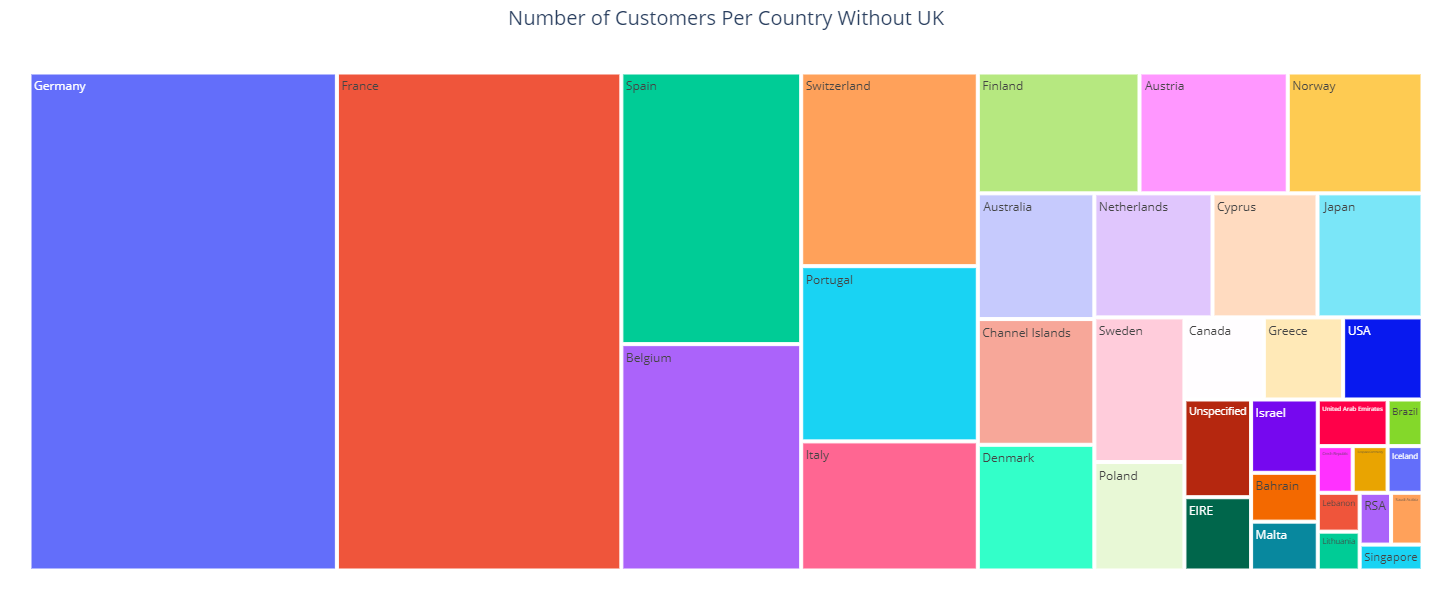

In [59]:
# PLOTLY TREEMAP
fig = px.treemap(df.groupby('country')[["customerid"]].nunique().sort_values(by="customerid", ascending=False).iloc[1:],
                 path=[df.groupby('country')[["customerid"]].nunique().sort_values(by="customerid", ascending=False).iloc[1:].index], 
                 values='customerid', 
                 width=1000, 
                 height=600)
fig.update_layout(title_text='Number of Customers Per Country Without UK',
                  title_x = 0.5, title_font = dict(size=20)
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

- These plots gives us the total number of unique customers for each country on a country basis.
- In general, we can say the following at first sight: 
<br>*According to the dataset we have, United Kingdom has an overwhelming advantage compared to other countries in terms of total number of unique customers.*

3. Visualize total cost per country

In [60]:
# We already created total price (aka. revenue) before. Let's use it!
pd.DataFrame(df.groupby('country').total_price.sum().sort_values(ascending=False)).head()

total_price
country                    
United Kingdom  7285024.644
Netherlands      285446.340
EIRE             265262.460
Germany          228678.400
France           208934.310

In [61]:
# Let's save this dataframe for future analysis.
df_total_price = pd.DataFrame(df.groupby('country')["total_price"].sum().sort_values(ascending=False))

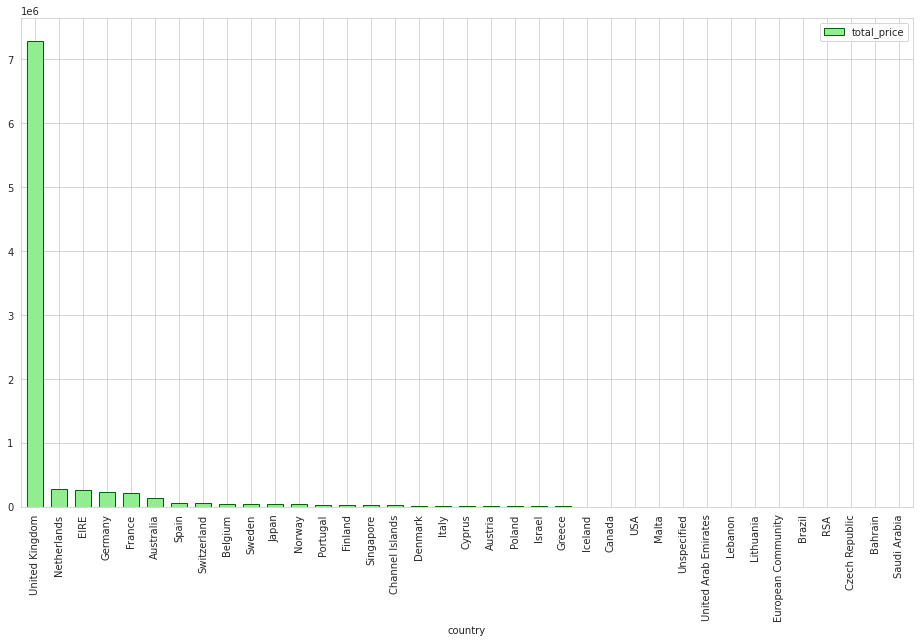

In [62]:
# MATPLOTLIB
# Attention to up left corner of plot --> 1e6 means 10**6
df_total_price.plot(kind="bar", width=0.7, color='lightgreen', edgecolor='darkgreen', figsize=(16,9));

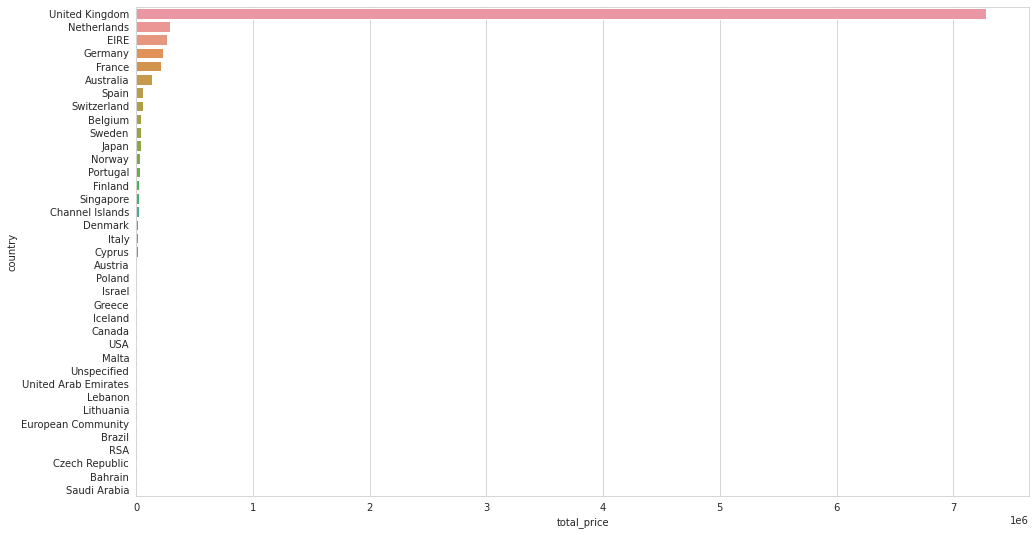

In [63]:
# SEABORN
plt.figure(figsize=(16,9))
# plt.xlim(145.920, 7285024.644) # To see and understand the_total price's range.
sns.barplot(data = df_total_price, x = df_total_price["total_price"], y = df_total_price.index);

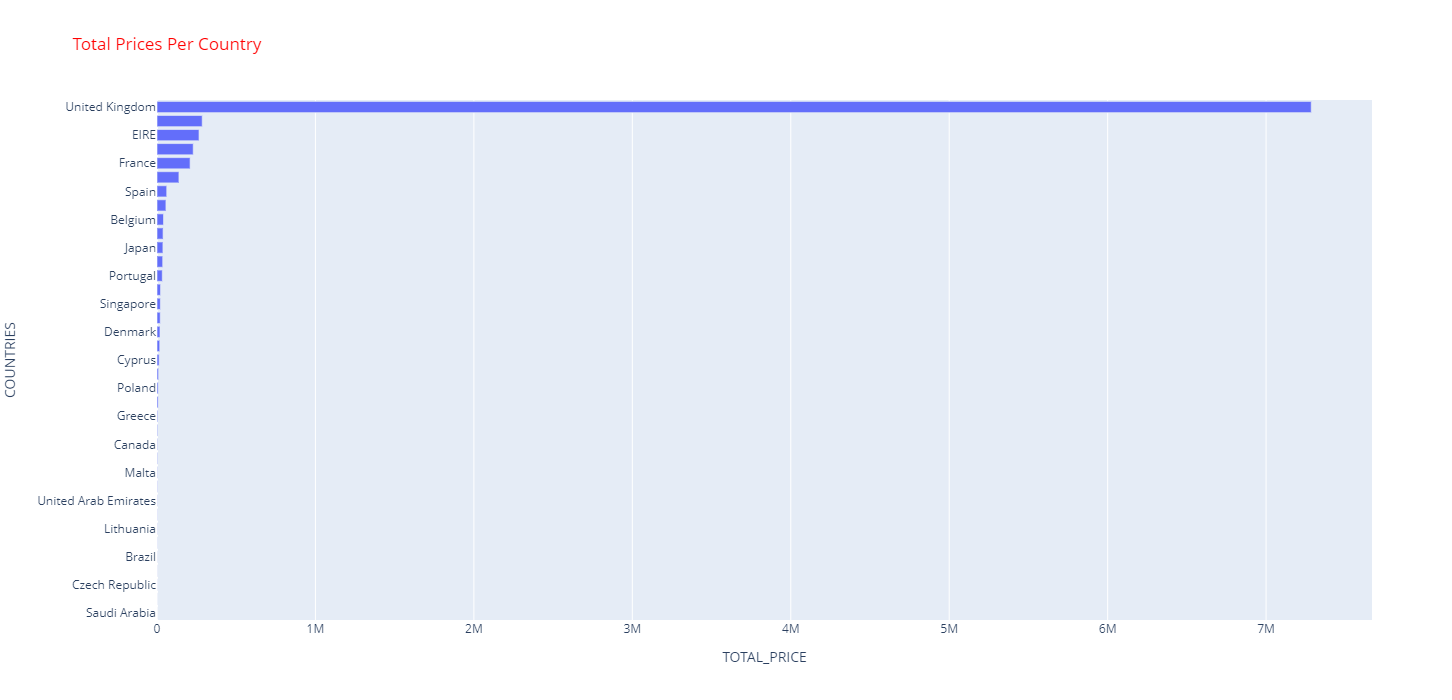

<Figure size 1152x648 with 0 Axes>

In [64]:
# PLOTLY BAR PLOT
import plotly.express as px
plt.figure(figsize = (16,9))
fig = px.bar(df_total_price, 
             x = "total_price", 
             y = df_total_price.index, 
             title="Total Prices Per Country")
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(xaxis_title="TOTAL_PRICE",yaxis_title="COUNTRIES", autosize=False, width=1400, height=700, title_font_color="red",)
fig.show()

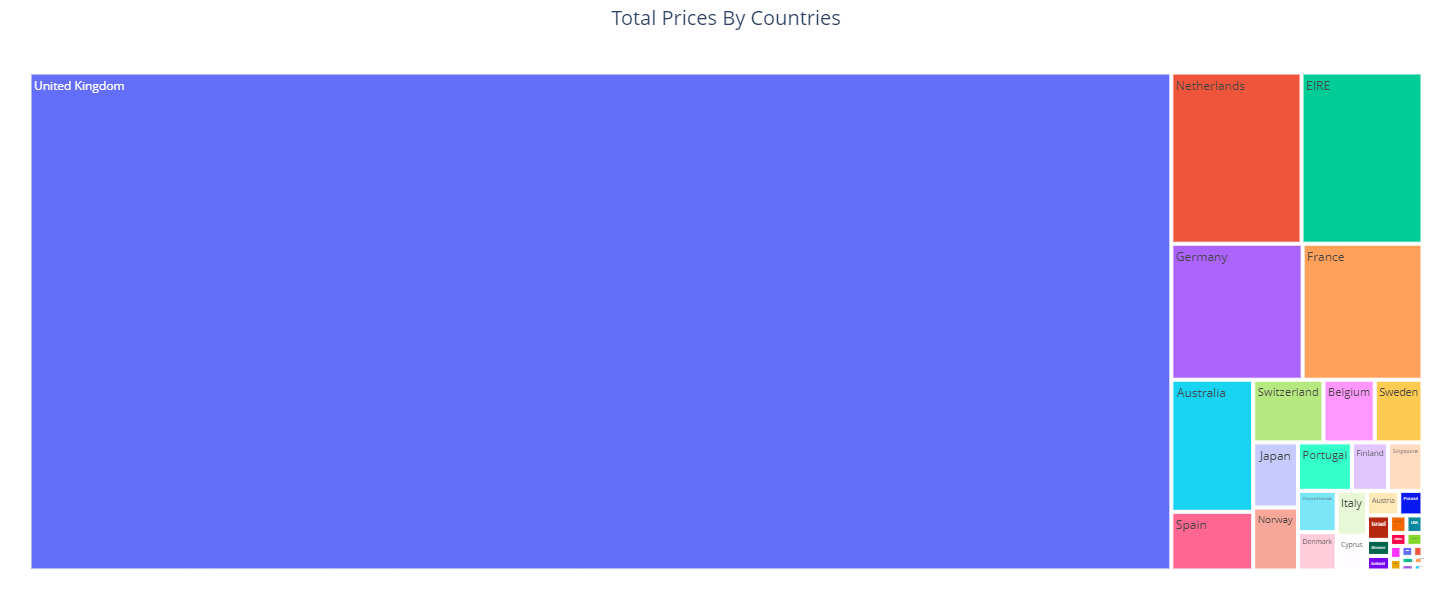

In [65]:
# PLOTLY TREEMAP
fig = px.treemap(df_total_price,
                 path=[df_total_price.index], 
                 values='total_price', 
                 width=1000, 
                 height=600)
fig.update_layout(title_text='Total Prices By Countries',
                  title_x = 0.5, title_font = dict(size=20)
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

- Let's see what our total price graph would look like if we didn't include United Kingdom.

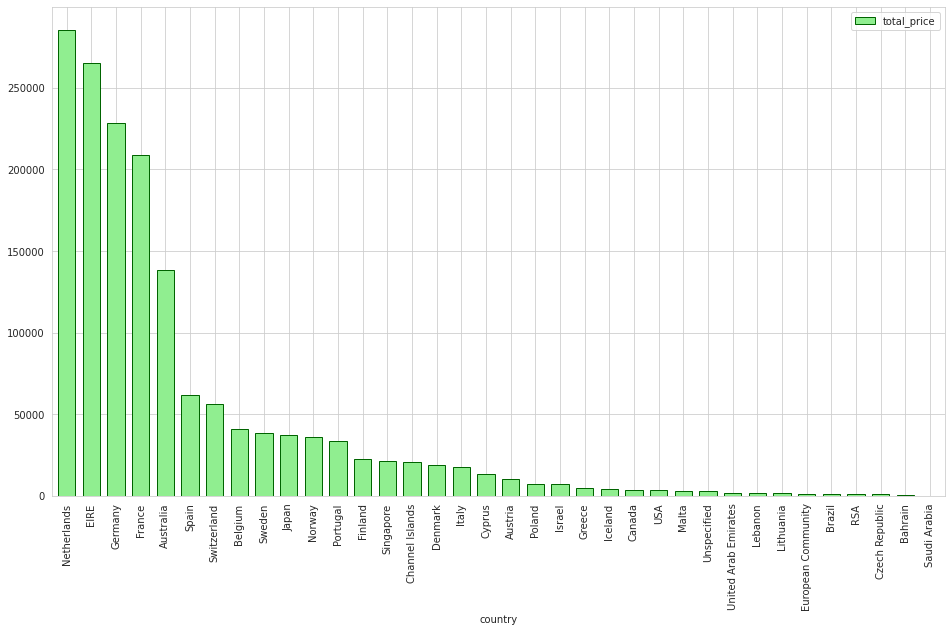

In [66]:
# MATPLOTLIB
# Attention to up left corner of plot --> 1e6 means 10**6
df_total_price.iloc[1:].plot(kind="bar", width=0.7, color='lightgreen', edgecolor='darkgreen', figsize=(16,9));

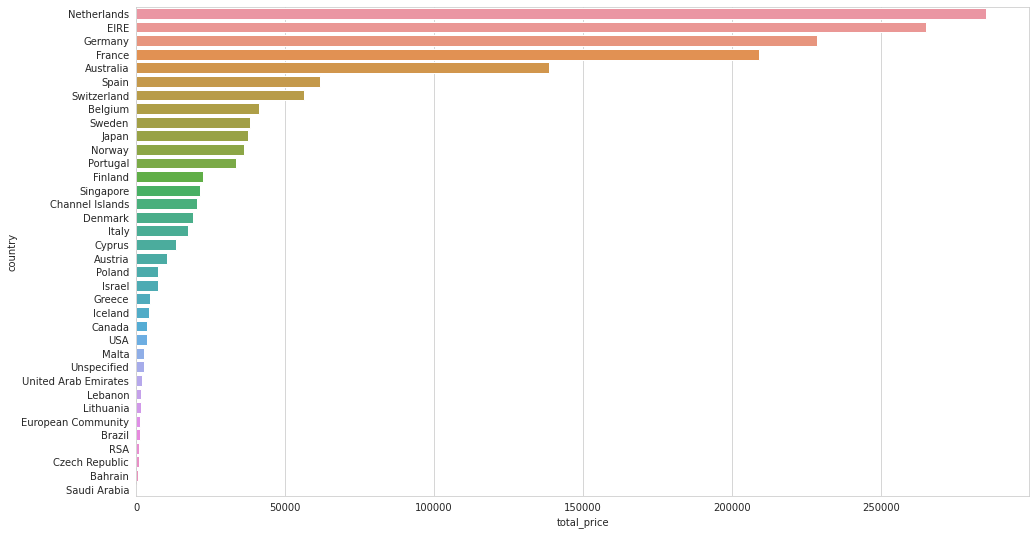

In [67]:
# SEABORN
plt.figure(figsize = (16,9))
sns.barplot(data = df_total_price.iloc[1:], x = df_total_price.iloc[1:]["total_price"], y = df_total_price.iloc[1:].index);

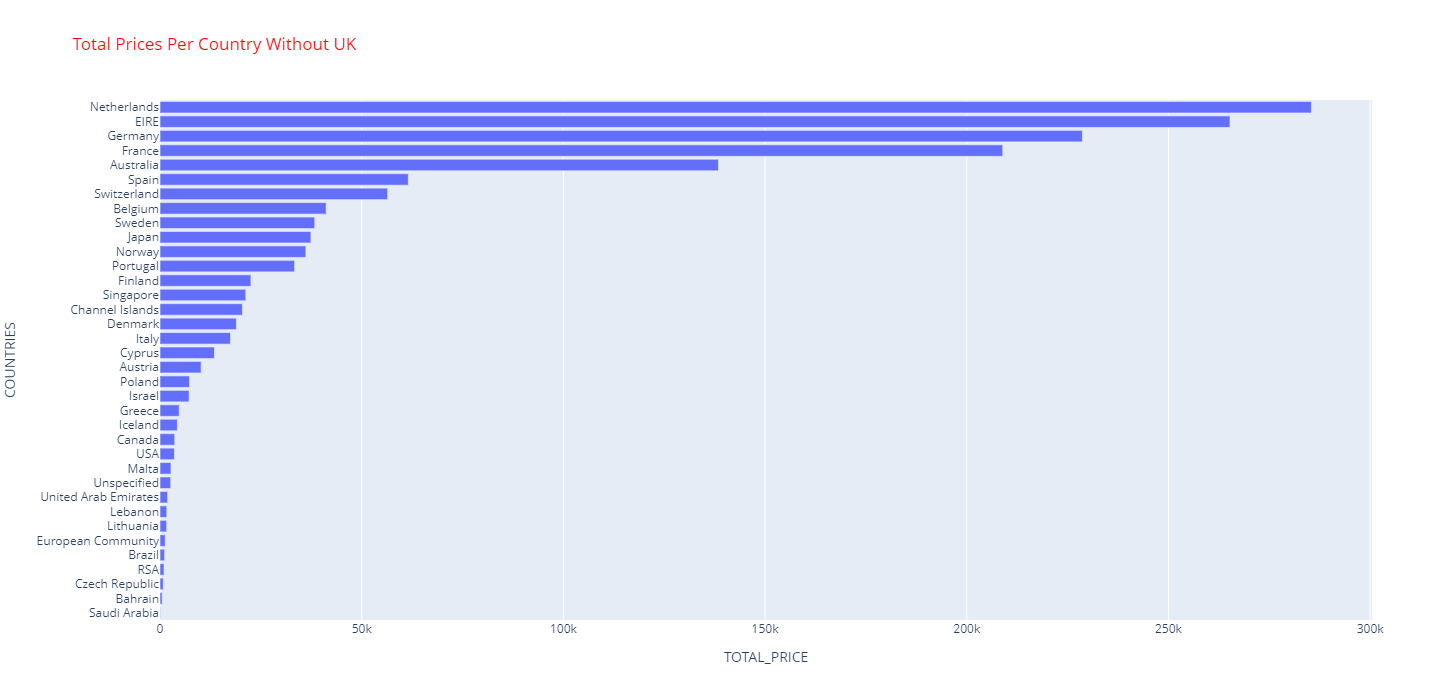

<Figure size 1152x648 with 0 Axes>

In [68]:
# PLOTLY BAR PLOT
import plotly.express as px
plt.figure(figsize = (16,9))
fig = px.bar(df_total_price.iloc[1:], x = "total_price", y = df_total_price.iloc[1:].index, title="Total Prices Per Country Without UK")
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(xaxis_title="TOTAL_PRICE",yaxis_title="COUNTRIES", autosize=False, width=1400, height=700, title_font_color="red",)
fig.show()

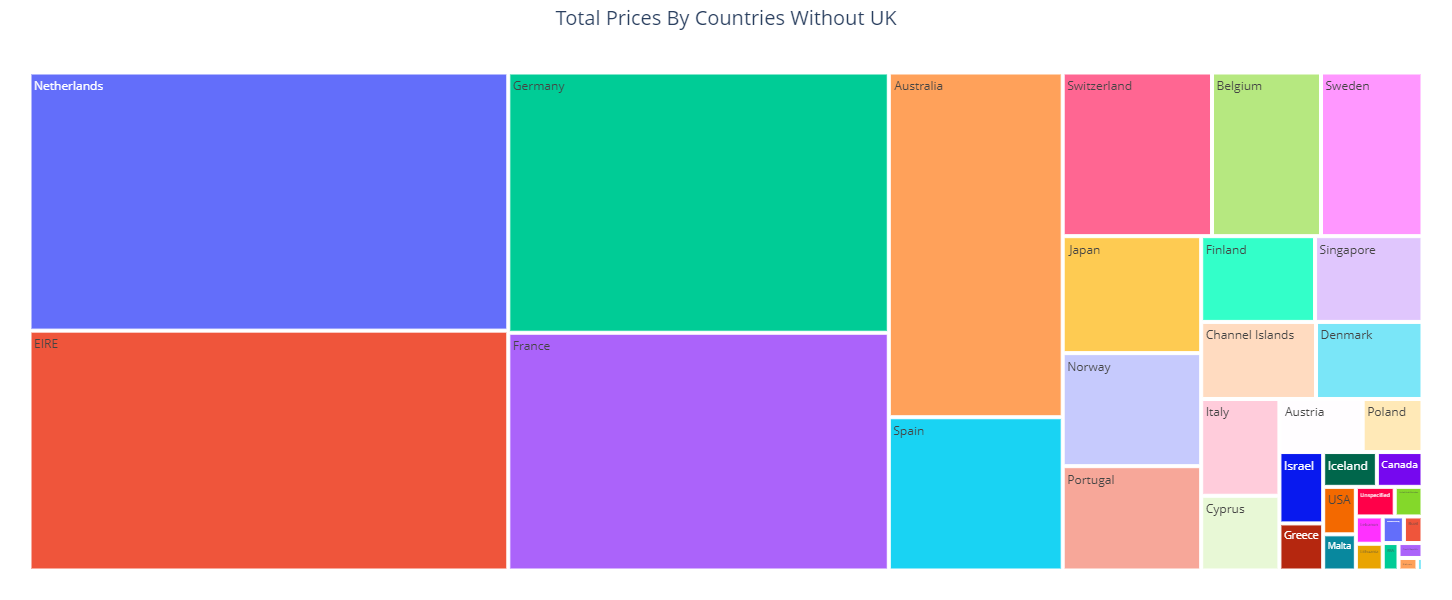

In [69]:
# PLOTLY TREEMAP
fig = px.treemap(df_total_price.iloc[1:],
                 path=[df_total_price.iloc[1:].index], 
                 values='total_price', 
                 width=1000, 
                 height=600)
fig.update_layout(title_text='Total Prices By Countries Without UK',
                  title_x = 0.5, title_font = dict(size=20)
)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

- Result: 
<br>The UK is not only the country with the most sales revenue, but also the country with the most customers.
<br>The majority of this dataset includes orders from the UK.
<br>So we can further explore the UK market by learning which products customers buy together and other buying behaviors to improve our sales and targeting strategy.

## <span style="color:#9C27B0; opacity:1"><font size="5">1.8 Explore the UK Market</font></span> <a id="4.8"></a>

1. Create df_uk DataFrame

In [70]:
df_uk = df[df["country"] == 'United Kingdom']
df_uk.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

           invoicedate  unitprice  customerid         country  total_price  
0  2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300  
1  2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340  
2  2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000  
3  2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340  
4  2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340

2. What are the most popular products that are bought in the UK?

- Let's take a look at our columns related to the product, from "Determines" section. Here the story of our dataset.
    - **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
    - **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
    - **Description**: Product (item) name. Nominal.
    - **Quantity**: The quantities of each product (item) per transaction. Numeric.
    - **InvoiceDate**: Invoice Date and time. Numeric, the day and time when each transaction was generated.
    - **UnitPrice**: Unit price. Numeric, Product price per unit in sterling.
    - **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
    - **Country**: Country name. Nominal, the name of the country where each customer resides.

- Let's see how much of each product UK has.

In [71]:
df_uk["stockcode"].value_counts()

85123A     1936
85099B     1461
22423.0    1417
84879.0    1320
47566.0    1300
           ... 
79323B        1
44265.0       1
47503J        1
84854.0       1
23843.0       1
Name: stockcode, Length: 3645, dtype: int64

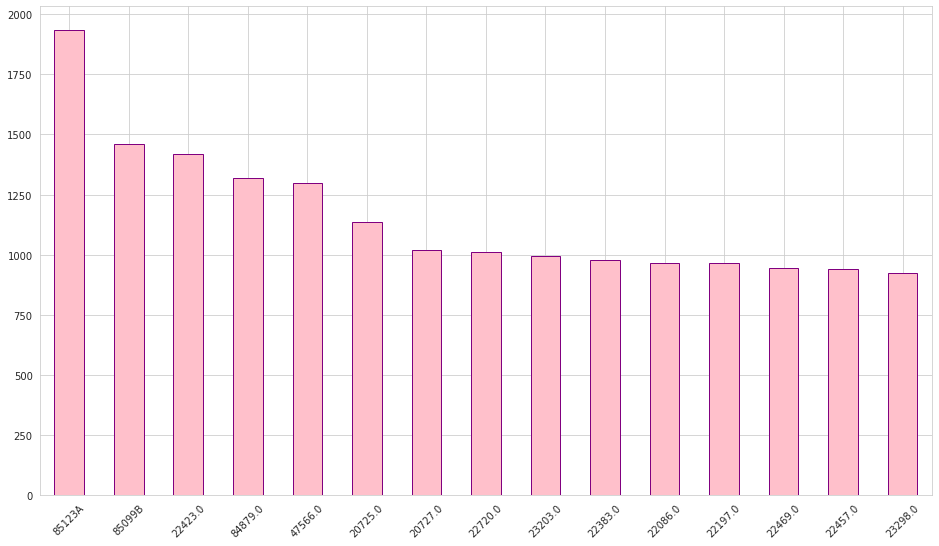

In [72]:
# Top 15 most owned products.
df_uk["stockcode"].value_counts().head(15).plot(kind="bar", width=0.5, color='pink', edgecolor='purple', figsize=(16,9))
plt.xticks(rotation=45);

- We will continue analyzing the UK transactions with customer segmentation.
- **Let's start the RFM analysis.**

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">2. RFM Analysis</font></span> <a id="5"></a>

## <span style="color:#9C27B0; opacity:1"><font size="5">2.1 What is RFM Analysis and Overview</font></span> <a id="5.1"></a>

In the age of the internet and e-commerce, companies that do not expand their businesses online or utilize digital tools to reach their customers will run into issues like scalability and a lack of digital precsence. An important marketing strategy e-commerce businesses use for analyzing and predicting customer value is customer segmentation. Customer data is used to sort customers into group based on their behaviors and preferences.

**[RFM](https://www.putler.com/rfm-analysis/) (Recency, Frequency, Monetary) Analysis** is a customer segmentation technique for analyzing customer value based on past buying behavior. RFM analysis was first used by the direct mail industry more than four decades ago, yet it is still an effective way to optimize your marketing.
<br>
<br>
Our goal in this Notebook is to cluster the customers in our data set to:
 - Recognize who are our most valuable customers
 - Increase revenue
 - Increase customer retention
 - Learn more about the trends and behaviors of our customers
 - Define customers that are at risk

We will start with **RFM Analysis** and then compliment our findings with predictive analysis using **K-Means Clustering Algorithms.**

- RECENCY (R): Time since last purchase
- FREQUENCY (F): Total number of purchases
- MONETARY VALUE (M): Total monetary value




Benefits of RFM Analysis

- Increased customer retention
- Increased response rate
- Increased conversion rate
- Increased revenue

RFM Analysis answers the following questions:
 - Who are our best customers?
 - Who has the potential to be converted into more profitable customers?
 - Which customers do we need to retain?
 - Which group of customers is most likely to respond to our marketing campaign?
 

- Now we can use "invoicedate" column to find when the products were last received. 
- Let's do it both for UK and for the whole dataset.

## <span style="color:#9C27B0; opacity:1"><font size="5">2.2 Review df_uk DataFrame</font></span> <a id="5.2"></a>

In [73]:
df_uk.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

           invoicedate  unitprice  customerid         country  total_price  
0  2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300  
1  2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340  
2  2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000  
3  2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340  
4  2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340

## <span style="color:#9C27B0; opacity:1"><font size="5">2.3 Calculate Recency</font></span> <a id="5.3"></a>

### Recency: Days since last purchase

To calculate the recency values, follow these steps in order:

1. To calculate recency, we need to choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.
2. Create a new column called Date which contains the invoice date without the timestamp
3. Group by CustomerID and check the last date of purchase
4. Calculate the days since last purchase
5. Drop Last_Purchase_Date since we don't need it anymore
6. Plot RFM distributions

1. Choose a date as a point of reference to evaluate how many days ago was the customer's last purchase.

- Now find the last and first selling date of my whole dataset.

In [74]:
last_invoice = max(df_uk['invoicedate'])
last_invoice

'2011-12-09 12:49:00'

In [75]:
first_invoice = min(df_uk['invoicedate'])
first_invoice

'2010-12-01 08:26:00'

2. Create a new column called Date which contains the invoice date without the timestamp

In [76]:
df_uk["invoicedate"].dtype.type

numpy.object_

In [77]:
# We need to change it's dtype as datetime
df_uk['invoicedate'] = pd.to_datetime(df_uk['invoicedate'])
df_uk["invoicedate"].dtype.type

numpy.datetime64

In [78]:
# We can do the same for the whole dataset, but it is not necessary.
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df["invoicedate"].dtype.type

numpy.datetime64

In [79]:
df_uk.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300  
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340  
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000  
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340  
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340

- Let's create a date column with only dates, need to extract time part (hour-min-sec etc). --invoice date without the timestamp--

In [80]:
df_uk["date"] = df_uk['invoicedate'].dt.date
df_uk.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   

         date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

In [81]:
# Not necessary
df["date"] = df['invoicedate'].dt.date
df.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   

         date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

3. Group by CustomerID and check the last date of purchase

- Now we will group dates by customers.
<br>But we can not use sum, unique, nunique etc directly. We can use transform and will get max or min or sum or count etc..
<br>https://pbpython.com/pandas_transform.html

- **TRANSFORM: provides to combine the output data back with the original dataframe.** Without using transform we can't get output's length same like dataframe

In [82]:
df_uk.groupby("customerid").date.max()

customerid
12346.000    2011-01-18
12747.000    2011-12-07
12748.000    2011-12-09
12749.000    2011-12-06
12820.000    2011-12-06
                ...    
18280.000    2011-03-07
18281.000    2011-06-12
18282.000    2011-12-02
18283.000    2011-12-06
18287.000    2011-10-28
Name: date, Length: 3920, dtype: object

In [83]:
df_uk.groupby("customerid").date.transform(max)

0         2010-12-02
1         2010-12-02
2         2010-12-02
3         2010-12-02
4         2010-12-02
             ...    
541889    2011-12-09
541890    2011-12-09
541891    2011-12-09
541892    2011-12-09
541893    2011-12-09
Name: date, Length: 349203, dtype: object

In [84]:
# Same length both of my last date and df_uk dataset.
# Because  I have unique customer ids here and I used transform
len(df_uk)

349203

In [85]:
# let's add this into dataset
df_uk["last_purchased_date"] = df_uk.groupby("customerid").date.transform(max)
df_uk.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   

         date last_purchased_date  
0  2010-12-01          2010-12-02  
1  2010-12-01          2010-12-02  
2  2010-12-01          2010-12-02  
3  2010-12-01          2010-12-02  
4  2010-12-01          2010-12-02

4. Calculate the days since last purchase

- That's the recency : Days since last purchase

In [86]:
last_invoice

'2011-12-09 12:49:00'

In [87]:
last_invoice = pd.to_datetime(last_invoice).date()
last_invoice

datetime.date(2011, 12, 9)

In [88]:
df_uk.groupby('customerid')['last_purchased_date'].apply(lambda x: last_invoice - x)

0        372 days
1        372 days
2        372 days
3        372 days
4        372 days
           ...   
541889     0 days
541890     0 days
541891     0 days
541892     0 days
541893     0 days
Name: last_purchased_date, Length: 349203, dtype: timedelta64[ns]

In [89]:
df_uk["recency"] = df_uk.groupby('customerid')['last_purchased_date'].apply(lambda x: last_invoice - x)
df_uk.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   

         date last_purchased_date  recency  
0  2010-12-01          2010-12-02 372 days  
1  2010-12-01          2010-12-02 372 days  
2  2010-12-01          2010-12-02 372 days  
3  2010-12-01          2010-12-02 372 days  
4  2010-12-01          2010-12-02 372 days

5. Drop Last_Purchase_Date since we don't need it anymore

In [90]:
df_uk = df_uk.drop('last_purchased_date',axis=1)

In [91]:
df_uk.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   

         date  recency  
0  2010-12-01 372 days  
1  2010-12-01 372 days  
2  2010-12-01 372 days  
3  2010-12-01 372 days  
4  2010-12-01 372 days

6. Plot RFM distributions

In [92]:
df_uk.recency.dtype.type

numpy.timedelta64

In [93]:
df_uk['recency'] = pd.to_numeric(df_uk['recency'].dt.days, downcast='integer')
df_uk.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   

         date  recency  
0  2010-12-01      372  
1  2010-12-01      372  
2  2010-12-01      372  
3  2010-12-01      372  
4  2010-12-01      372

In [94]:
df_uk.recency.dtype.type

numpy.int16

- 2 differences between hist plot and distplot:
<br>1. Dist plot adds the kde curve by default and brings the density on the vertical axis.
<br>2. If you specified kde = True on the hist plot, it returns the kde curve and returns the count value on the vertical axis.

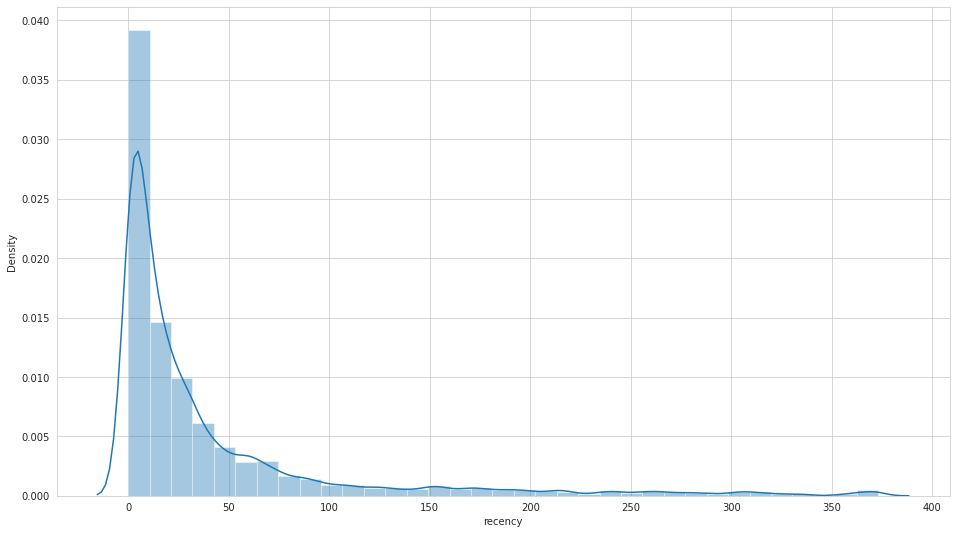

In [95]:
plt.figure(figsize=(16,9))
sns.distplot(df_uk['recency'], bins=35);

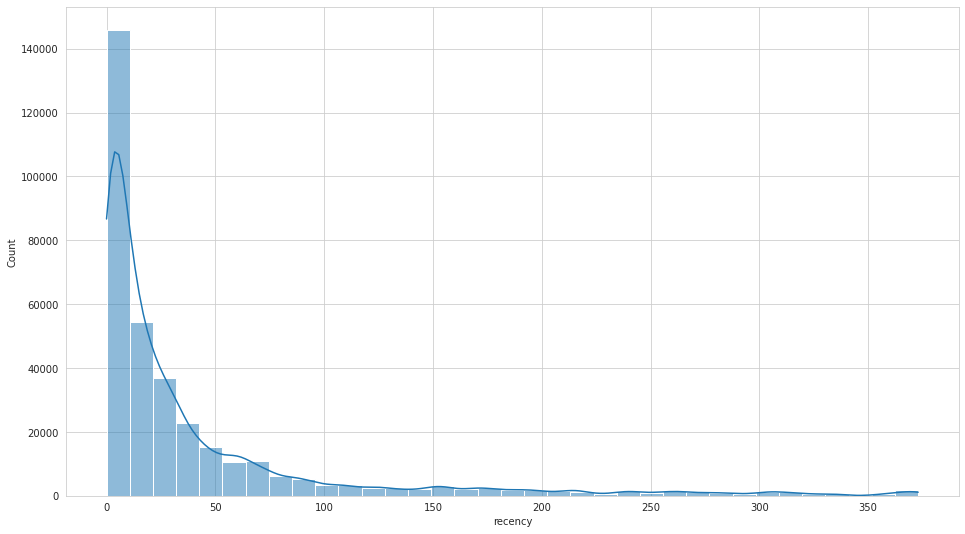

In [96]:
plt.figure(figsize=(16,9))
sns.histplot(df_uk['recency'], kde = True, bins=35);

## <span style="color:#9C27B0; opacity:1"><font size="5">2.4 Calculate Frequency</font></span> <a id="5.4"></a>

### Frequency: Number of purchases

To calculate how many times a customer purchased something, we need to count how many invoices each customer has. To calculate the frequency values, follow these steps in order:

1. Make a copy of df_uk and drop duplicates

In [97]:
df_uk.duplicated().sum()

0

In [98]:
df_uk.duplicated().any()

False

In [99]:
# Let's drop anyway
df_uk = df_uk.drop_duplicates()

2. Calculate the frequency of purchases

- When we look at the definition of invoiceno, we see:
<br>*Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.*

In [100]:
df_uk.groupby('customerid')["invoiceno"].count().sort_values(ascending = False)

customerid
17841.000    7676
14096.000    5111
12748.000    4412
14606.000    2677
15311.000    2366
             ... 
17347.000       1
15316.000       1
15313.000       1
13270.000       1
12346.000       1
Name: invoiceno, Length: 3920, dtype: int64

In [101]:
# Exact length is gotten only by using transform
df_uk.groupby('customerid')["invoiceno"].transform('count').sort_values(ascending = False)

388170    7676
303314    7676
303321    7676
303320    7676
303319    7676
          ... 
63201        1
206692       1
293674       1
252          1
255504       1
Name: invoiceno, Length: 349203, dtype: int64

In [102]:
df_uk['frequency'] = df_uk.groupby('customerid')["invoiceno"].transform('count')
df_uk.head(3)

invoiceno stockcode                         description  quantity  \
0  536365.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                 WHITE METAL LANTERN     6.000   
2  536365.0    84406B      CREAM CUPID HEARTS COAT HANGER     8.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   

         date  recency  frequency  
0  2010-12-01      372        297  
1  2010-12-01      372        297  
2  2010-12-01      372        297

3. Plot RFM distributions

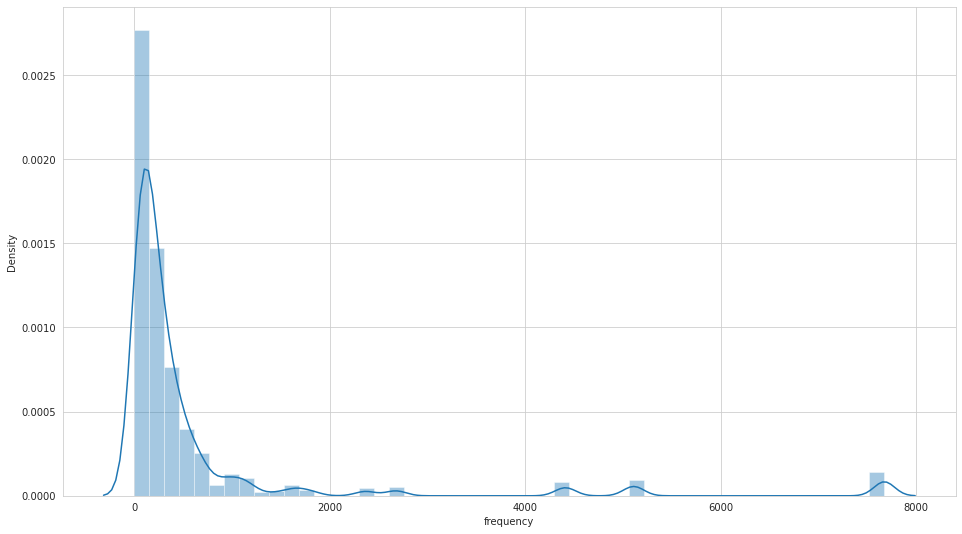

In [103]:
plt.figure(figsize=(16,9))
sns.distplot(df_uk['frequency'], bins=50);

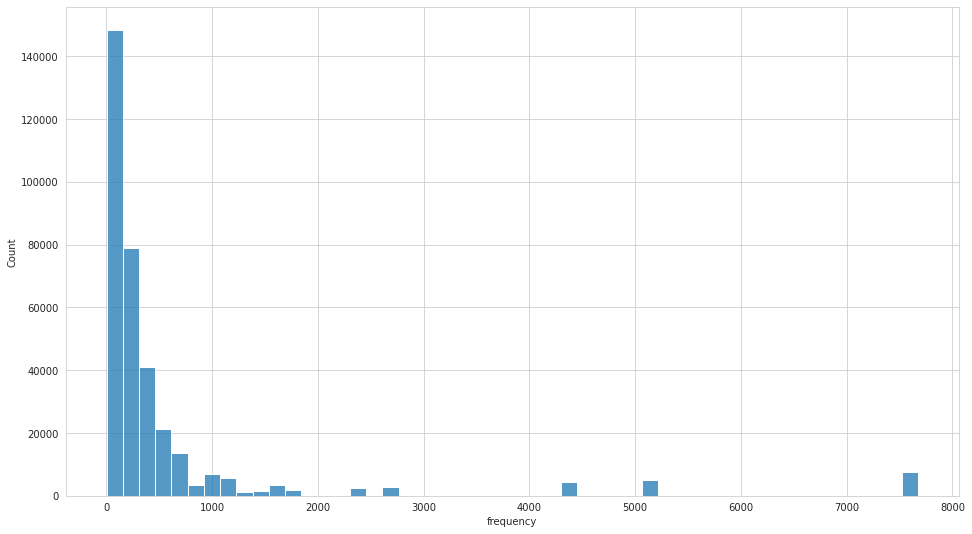

In [104]:
plt.figure(figsize=(16,9))
sns.histplot(df_uk['frequency'], bins=50);

## <span style="color:#9C27B0; opacity:1"><font size="5">2.5 Calculate Monetary Values</font></span> <a id="5.5"></a>

### Monetary: Total amount of money spent

The monetary value is calculated by adding together the cost of the customers' purchases.


1. Calculate sum total cost by customers and named "Monetary"

In [105]:
df_uk.groupby('customerid')["total_price"].transform('sum')

0         5391.210
1         5391.210
2         5391.210
3         5391.210
4         5391.210
            ...   
541889    4206.390
541890   12245.960
541891   12245.960
541892   12245.960
541893   12245.960
Name: total_price, Length: 349203, dtype: float64

In [106]:
df_uk["monetary"] = df_uk.groupby('customerid')["total_price"].transform('sum')
df_uk.head(3)

invoiceno stockcode                         description  quantity  \
0  536365.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                 WHITE METAL LANTERN     6.000   
2  536365.0    84406B      CREAM CUPID HEARTS COAT HANGER     8.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   

         date  recency  frequency  monetary  
0  2010-12-01      372        297  5391.210  
1  2010-12-01      372        297  5391.210  
2  2010-12-01      372        297  5391.210

2. Plot RFM distributions

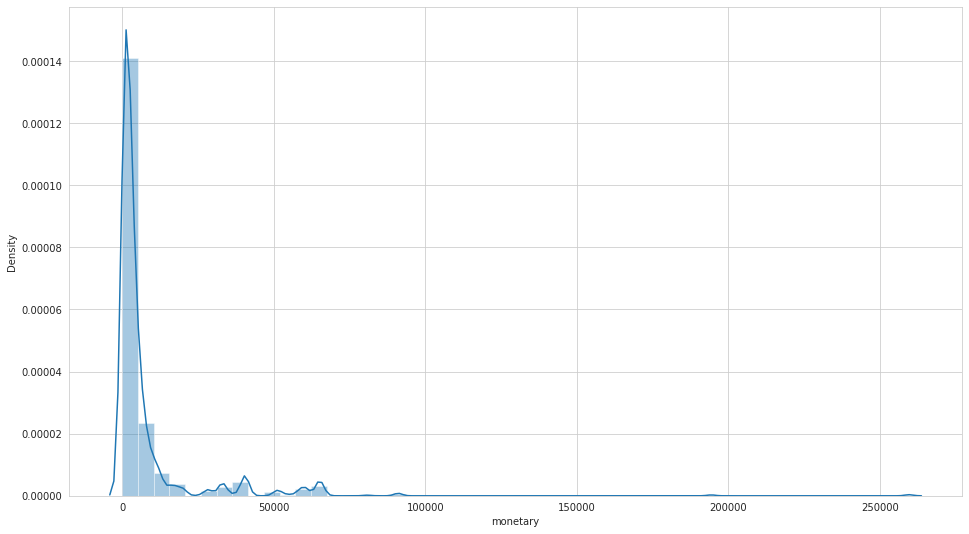

In [107]:
plt.figure(figsize=(16,9))
sns.distplot(df_uk['monetary'], bins=50);

## <span style="color:#9C27B0; opacity:1"><font size="5">2.6 Create RFM Table</font></span> <a id="5.6"></a>

Need to merge the recency, frequency and motetary dataframes

In [108]:
df_uk.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   

         date  recency  frequency  monetary  
0  2010-12-01      372        297  5391.210  
1  2010-12-01      372        297  5391.210  
2  2010-12-01      372        297  5391.210  
3  2010-12-01      372        297  5391.210  
4  2010-12-01      372        297  5391.210

In [109]:
df_rfm_table = df_uk[['customerid', 'recency', 'frequency', 'monetary']]
df_rfm_table.head()

customerid  recency  frequency  monetary
0   17850.000      372        297  5391.210
1   17850.000      372        297  5391.210
2   17850.000      372        297  5391.210
3   17850.000      372        297  5391.210
4   17850.000      372        297  5391.210

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">3. Customer Segmentation with RFM Scores</font></span> <a id="6"></a>

Businesses have this ever-lasting urge to understand their customers. The better you understand the customer, the better you serve them, and the higher the financial gain you receive from that customer. Since the dawn of trade, this process of understanding customers for a strategic gain has been there practiced and this task is known majorly as [Customer Segmentation](https://clevertap.com/blog/rfm-analysis/).
Well as the name suggests, Customer Segmentation could segment customers according to their precise needs. Some of the common ways of segmenting customers are based on their Recency-Frequency-Monatory values, their demographics like gender, region, country, etc, and some of their business-crafted scores. You will use Recency-Frequency-Monatory values for this case.

In this section, you will create an RFM Segmentation Table where you segment your customers by using the RFM table. For example, you can label the best customer as "Big Spenders" and the lost customer as "Lost Customer".

*Source : https://clevertap.com/blog/rfm-analysis/*<br>
RFM stands for Recency, Frequency, and Monetary value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.

## <span style="color:#9C27B0; opacity:1"><font size="5">3.1 Calculate RFM Scoring</font></span> <a id="6.1"></a>

The simplest way to create customer segments from an RFM model is by using **Quartiles**. We will assign a score from 1 to 4 to each category (Recency, Frequency, and Monetary) with 4 being the highest/best value. The final RFM score is calculated by combining all RFM values. For Customer Segmentation, you will use the df_rfm data set resulting from the RFM analysis.
<br>
<br>
**Note**: Data can be assigned into more groups for better granularity, but we will use 4 in this case.

1. Divide the df_rfm into quarters

In [110]:
df_rfm_table

customerid  recency  frequency  monetary
0        17850.000      372        297  5391.210
1        17850.000      372        297  5391.210
2        17850.000      372        297  5391.210
3        17850.000      372        297  5391.210
4        17850.000      372        297  5391.210
...            ...      ...        ...       ...
541889   15804.000        0        262  4206.390
541890   13113.000        0        200 12245.960
541891   13113.000        0        200 12245.960
541892   13113.000        0        200 12245.960
541893   13113.000        0        200 12245.960

[349203 rows x 4 columns]

In [111]:
df_rfm_table = df_rfm_table.set_index('customerid')
df_rfm_table.head()

recency  frequency  monetary
customerid                              
17850.000       372        297  5391.210
17850.000       372        297  5391.210
17850.000       372        297  5391.210
17850.000       372        297  5391.210
17850.000       372        297  5391.210

In [112]:
df_rfm_table.shape

(349203, 3)

In [113]:
df_rfm_table.duplicated().any()

True

In [114]:
df_rfm_table.reset_index().duplicated().sum()

345283

In [115]:
df_rfm_table.drop_duplicates(inplace=True)
df_rfm_table.shape

(3920, 3)

## <span style="color:#9C27B0; opacity:1"><font size="5">3.2 Creating the RFM Segmentation Table</font></span> <a id="6.2"></a>

1. Create two functions, one for Recency and one for Frequency and Monetary. For Recency, customers in the first quarter should be scored as 4, this represents the highest Recency value. Conversely, for Frequency and Monetary, customers in the last quarter should be scored as 4, representing the highest Frequency and Monetary values.

- help(np.quantile)

2. Score customers from 1 to 4 by applying the functions you have created. Also create separate score column for each value. 

- *Recency*

In [116]:
df_rfm_table["recency"].quantile(q = [.25,.5,.75])

0.250    17.000
0.500    50.000
0.750   142.000
Name: recency, dtype: float64

In [117]:
def recency_scoring(data):
    if data["recency"] <= 17.000:
        return 4
    elif data["recency"] <= 50.000:
        return 3
    elif data["recency"] <= 142.000:
        return 2
    else:
        return 1

In [118]:
df_rfm_table['recency_quantile'] = df_rfm_table.apply(recency_scoring, axis =1)
df_rfm_table.head()

recency  frequency  monetary  recency_quantile
customerid                                                
17850.000       372        297  5391.210                 1
13047.000        31        172  3237.540                 3
13748.000        95         28   948.250                 2
15100.000       333          3   876.000                 1
15291.000        25        103  4668.300                 3

- *Frequency*

In [119]:
df_rfm_table["frequency"].quantile(q = [.25,.5,.75])

0.250   17.000
0.500   40.000
0.750   98.000
Name: frequency, dtype: float64

In [120]:
def frequency_scoring(data):
    if data.frequency <= 17.000:
        return 1
    elif data.frequency <= 40.000:
        return 2
    elif data.frequency <= 98.000:
        return 3
    else:
        return 4

In [121]:
df_rfm_table['frequency_quantile'] = df_rfm_table.apply(frequency_scoring, axis =1)
df_rfm_table.head()

recency  frequency  monetary  recency_quantile  frequency_quantile
customerid                                                                    
17850.000       372        297  5391.210                 1                   4
13047.000        31        172  3237.540                 3                   4
13748.000        95         28   948.250                 2                   2
15100.000       333          3   876.000                 1                   1
15291.000        25        103  4668.300                 3                   4

- *Monetary*

In [122]:
df_rfm_table["monetary"].quantile(q = [.25,.5,.75])

0.250    298.185
0.500    644.975
0.750   1571.285
Name: monetary, dtype: float64

In [123]:
def monetary_scoring(data):
    if data.monetary <= 298.185:
        return 1
    elif data.monetary <= 644.975:
        return 2
    elif data.monetary <= 1571.285:
        return 3
    else:
        return 4

In [124]:
df_rfm_table['monetary_quantile'] = df_rfm_table.apply(monetary_scoring, axis =1)
df_rfm_table.head()

recency  frequency  monetary  recency_quantile  \
customerid                                                   
17850.000       372        297  5391.210                 1   
13047.000        31        172  3237.540                 3   
13748.000        95         28   948.250                 2   
15100.000       333          3   876.000                 1   
15291.000        25        103  4668.300                 3   

            frequency_quantile  monetary_quantile  
customerid                                         
17850.000                    4                  4  
13047.000                    4                  4  
13748.000                    2                  3  
15100.000                    1                  3  
15291.000                    4                  4

3. Now that scored each customer, you'll combine the scores for segmentation.

In [125]:
def rfm_scoring(data):
    return str(int(data['recency_quantile'])) + str(int(data['frequency_quantile'])) + str(int(data['monetary_quantile']))

In [126]:
df_rfm_table['rfm_score'] = df_rfm_table.apply(rfm_scoring, axis=1)
df_rfm_table.head()

recency  frequency  monetary  recency_quantile  \
customerid                                                   
17850.000       372        297  5391.210                 1   
13047.000        31        172  3237.540                 3   
13748.000        95         28   948.250                 2   
15100.000       333          3   876.000                 1   
15291.000        25        103  4668.300                 3   

            frequency_quantile  monetary_quantile rfm_score  
customerid                                                   
17850.000                    4                  4       144  
13047.000                    4                  4       344  
13748.000                    2                  3       223  
15100.000                    1                  3       113  
15291.000                    4                  4       344

In [127]:
df_rfm_table["rfm_score"].dtype.type

numpy.object_

In [128]:
df_rfm_table["rfm_score"].dtype.type

numpy.object_

4. Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Level

In [129]:
df_rfm_table['rfm_level'] = df_rfm_table['recency_quantile'] + df_rfm_table['frequency_quantile'] + df_rfm_table['monetary_quantile']
df_rfm_table.head()

recency  frequency  monetary  recency_quantile  \
customerid                                                   
17850.000       372        297  5391.210                 1   
13047.000        31        172  3237.540                 3   
13748.000        95         28   948.250                 2   
15100.000       333          3   876.000                 1   
15291.000        25        103  4668.300                 3   

            frequency_quantile  monetary_quantile rfm_score  rfm_level  
customerid                                                              
17850.000                    4                  4       144          9  
13047.000                    4                  4       344         11  
13748.000                    2                  3       223          7  
15100.000                    1                  3       113          5  
15291.000                    4                  4       344         11

5. Calculate average values for each RFM_Level, and return a size of each segment 

In [130]:
# Let's see how many of which "rfm_score" here are.
df_rfm_table['rfm_score'].value_counts().sort_values(ascending=False).head()

444    407
111    343
344    184
122    178
211    166
Name: rfm_score, dtype: int64

- The first way to create a "segments" column.
    - Our minimum rfm_level score is 3 and maximum 12.
    - We can roughly classify these numbers.

In [131]:
def segments1(data):
    if data['rfm_level'] >= 10 :
        return 'Gold'
    elif (data['rfm_level'] >= 6) and (data['rfm_level'] < 10 ):
        return 'Silver'
    else:  
        return 'Bronze'

In [132]:
df_rfm_table ['segments1'] = df_rfm_table.apply(segments1,axis=1)
df_rfm_table.head()

recency  frequency  monetary  recency_quantile  \
customerid                                                   
17850.000       372        297  5391.210                 1   
13047.000        31        172  3237.540                 3   
13748.000        95         28   948.250                 2   
15100.000       333          3   876.000                 1   
15291.000        25        103  4668.300                 3   

            frequency_quantile  monetary_quantile rfm_score  rfm_level  \
customerid                                                               
17850.000                    4                  4       144          9   
13047.000                    4                  4       344         11   
13748.000                    2                  3       223          7   
15100.000                    1                  3       113          5   
15291.000                    4                  4       344         11   

           segments1  
customerid            
17850.000     Silver  
13047.000       Gold  
13748.000     Silver  
15100.000     Bronze  
15291.000       Gold

- The second way to create a "segments" column.
    - Will be very detailed.

In [133]:
segments2 = {
             'Customer Segment':
                                ['Champions',
                                 'Loyal Customers',
                                 'Potential Loyalist', 
                                 'Recent Customers', 
                                 'Customers Needing Attention', 
                                 'Still Got Hope', 
                                 'Need to Get Them Back',
                                 'Lost', 'Give it a Try'],\
                           'RFM':
                                ['(3|4)-(3|4)-(3|4)', 
                                 '(2|3|4)-(3|4)-(1|2|3|4)', 
                                 '(3|4)-(2|3)-(1|2|3|4)', 
                                 '(4)-(1)-(1|2|3|4)', 
                                 '(2|3)-(2|3)-(2|3)', 
                                 '(2|3)-(1|2)-(1|2|3|4)', 
                                 '(1|2)-(3|4)-(2|3|4)', 
                                 '(1|2)-(1|2)-(1|2)',
                                 '(1|2)-(1|2|3)-(1|2|3|4)']
            }
pd.DataFrame(segments2)

Customer Segment                      RFM
0                    Champions        (3|4)-(3|4)-(3|4)
1              Loyal Customers  (2|3|4)-(3|4)-(1|2|3|4)
2           Potential Loyalist    (3|4)-(2|3)-(1|2|3|4)
3             Recent Customers        (4)-(1)-(1|2|3|4)
4  Customers Needing Attention        (2|3)-(2|3)-(2|3)
5               Still Got Hope    (2|3)-(1|2)-(1|2|3|4)
6        Need to Get Them Back      (1|2)-(3|4)-(2|3|4)
7                         Lost        (1|2)-(1|2)-(1|2)
8                Give it a Try  (1|2)-(1|2|3)-(1|2|3|4)

In [134]:
def categorizer(rfm):
    if (rfm[0] in ['3', '4']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['3', '4']):
        rfm = 'Champions'
        
    elif (rfm[0] in ['2', '3', '4']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Loyal Customers'
        
    elif (rfm[0] in ['3', '4']) & (rfm[1] in ['2', '3']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Potential Loyalist'
    
    elif (rfm[0] in ['4']) & (rfm[1] in ['1']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Recent Customers'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['2', '3']) & (rfm[2] in ['2', '3']):
        rfm = 'Customers Needing Attention'
    
    elif (rfm[0] in ['2', '3']) & (rfm[1] in ['1', '2']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Still Got Hope'
    
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['3', '4']) & (rfm[2] in ['2', '3', '4']):
        rfm = 'Need to Get Them Back'
                
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['1', '2']) & (rfm[2] in ['1', '2']):
        rfm = 'Lost'
    
    elif (rfm[0] in ['1', '2']) & (rfm[1] in ['1', '2', '3']) & (rfm[2] in ['1', '2', '3', '4']):
        rfm = 'Give it a Try'
    
    return rfm 

In [135]:
df_rfm_table['segments2'] = df_rfm_table["rfm_score"].apply(categorizer)
df_rfm_table.head()

recency  frequency  monetary  recency_quantile  \
customerid                                                   
17850.000       372        297  5391.210                 1   
13047.000        31        172  3237.540                 3   
13748.000        95         28   948.250                 2   
15100.000       333          3   876.000                 1   
15291.000        25        103  4668.300                 3   

            frequency_quantile  monetary_quantile rfm_score  rfm_level  \
customerid                                                               
17850.000                    4                  4       144          9   
13047.000                    4                  4       344         11   
13748.000                    2                  3       223          7   
15100.000                    1                  3       113          5   
15291.000                    4                  4       344         11   

           segments1                    segments2  
customerid                                         
17850.000     Silver        Need to Get Them Back  
13047.000       Gold                    Champions  
13748.000     Silver  Customers Needing Attention  
15100.000     Bronze                Give it a Try  
15291.000       Gold                    Champions

In [136]:
df_rfm_table["segments2"].value_counts(dropna=False)

Champions                      1179
Lost                            716
Loyal Customers                 583
Still Got Hope                  513
Potential Loyalist              354
Customers Needing Attention     215
Need to Get Them Back           163
Give it a Try                   100
Recent Customers                 97
Name: segments2, dtype: int64

## <span style="color:#9C27B0; opacity:1"><font size="5">3.3 Plot RFM Segments</font></span> <a id="6.3"></a>

1. Create your plot and resize it.

- *Segments1*

In [137]:
df_plot1 = pd.DataFrame(df_rfm_table["segments1"].value_counts(dropna=False).sort_values(ascending=False)).reset_index().rename(columns={'index':'Segments', 'segments1':'Customers'})
df_plot1

Segments  Customers
0   Silver       1603
1   Bronze       1175
2     Gold       1142

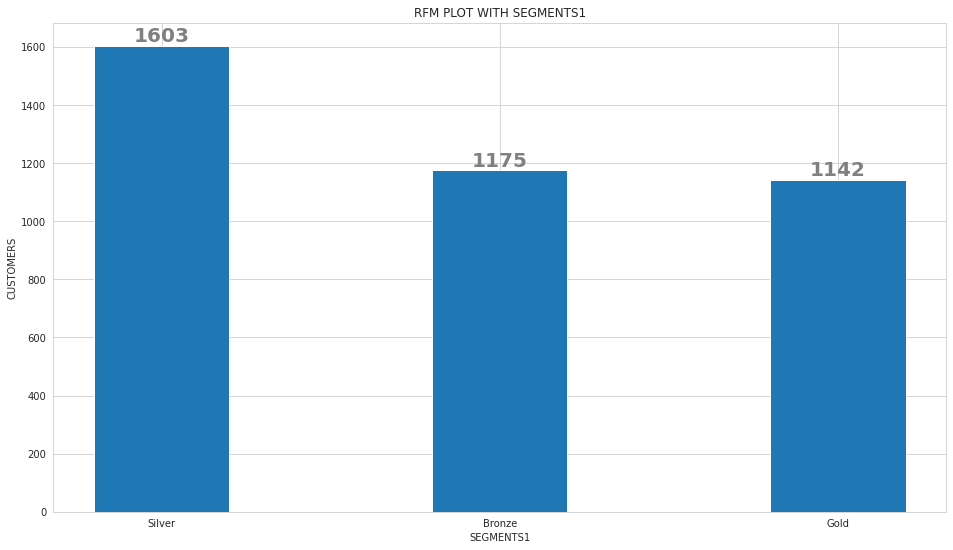

In [138]:
# MATPLOTLIB
y = df_plot1.Customers.values
x = df_plot1.Segments.values

fig, ax = plt.subplots(figsize = (16,9), dpi=72)
ax.bar(x,y,width=0.4)

plt.title("RFM PLOT WITH SEGMENTS1")
plt.xlabel("SEGMENTS1");
plt.ylabel("CUSTOMERS");

for index,value in enumerate(y):
    plt.text(x=index , y =value , s=str(value) , ha="center", va="bottom", color = 'gray', fontweight = 'bold', fontdict=dict(fontsize=20))
plt.show()

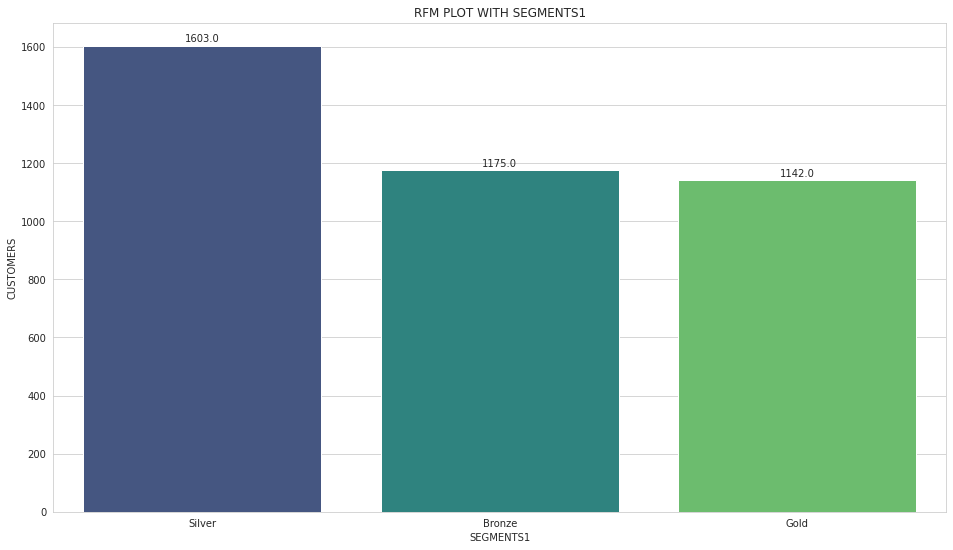

In [139]:
# SEABORN

# Show Values on Seaborn Barplot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        
plt.figure(figsize=(16, 9))
plt.title("RFM PLOT WITH SEGMENTS1")
p = sns.barplot(data = df_plot1, x = 'Segments', y = 'Customers', palette = 'viridis')
p.set(xlabel='SEGMENTS1', ylabel='CUSTOMERS')
show_values(p);

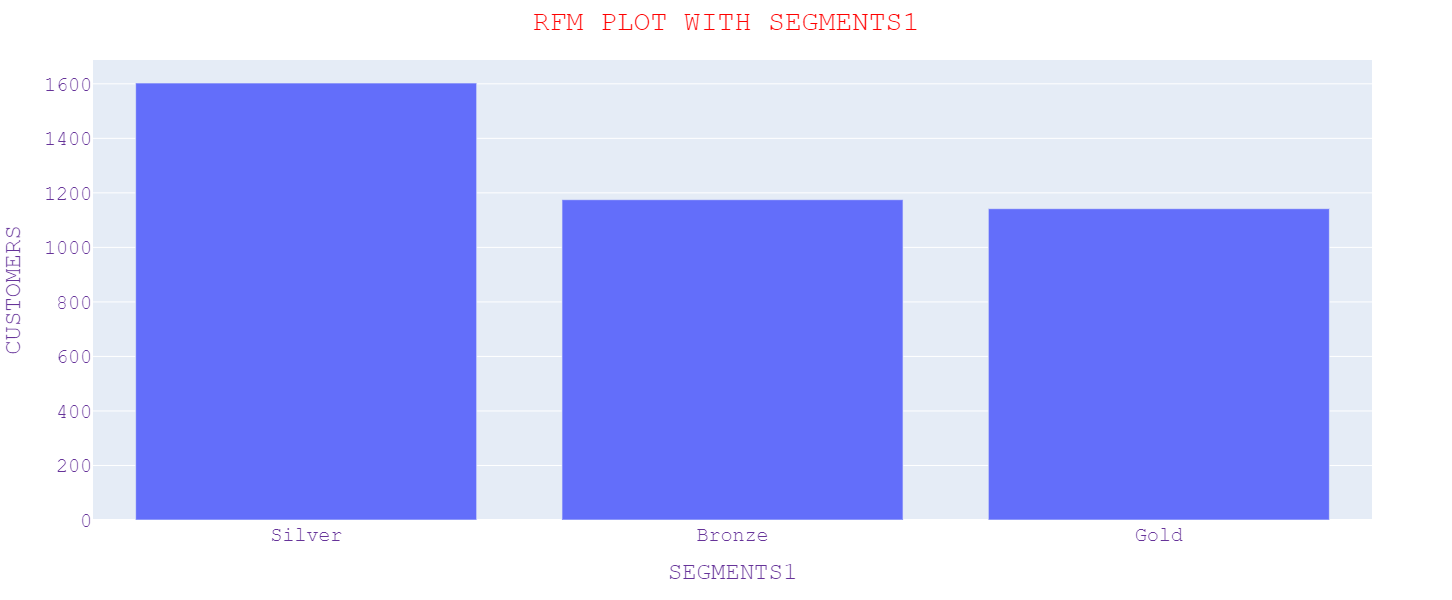

In [140]:
# PLOTLY

fig = px.bar(df_plot1, x = "Segments", y = "Customers", width=950, height=600)
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(title="RFM PLOT WITH SEGMENTS1", xaxis_title="SEGMENTS1", yaxis_title="CUSTOMERS", legend_title="Segments1", title_font_color="red", title_x=0.5,
                  font=dict(family="Courier New, monospace", size=20, color="RebeccaPurple")
                 )
fig.show()

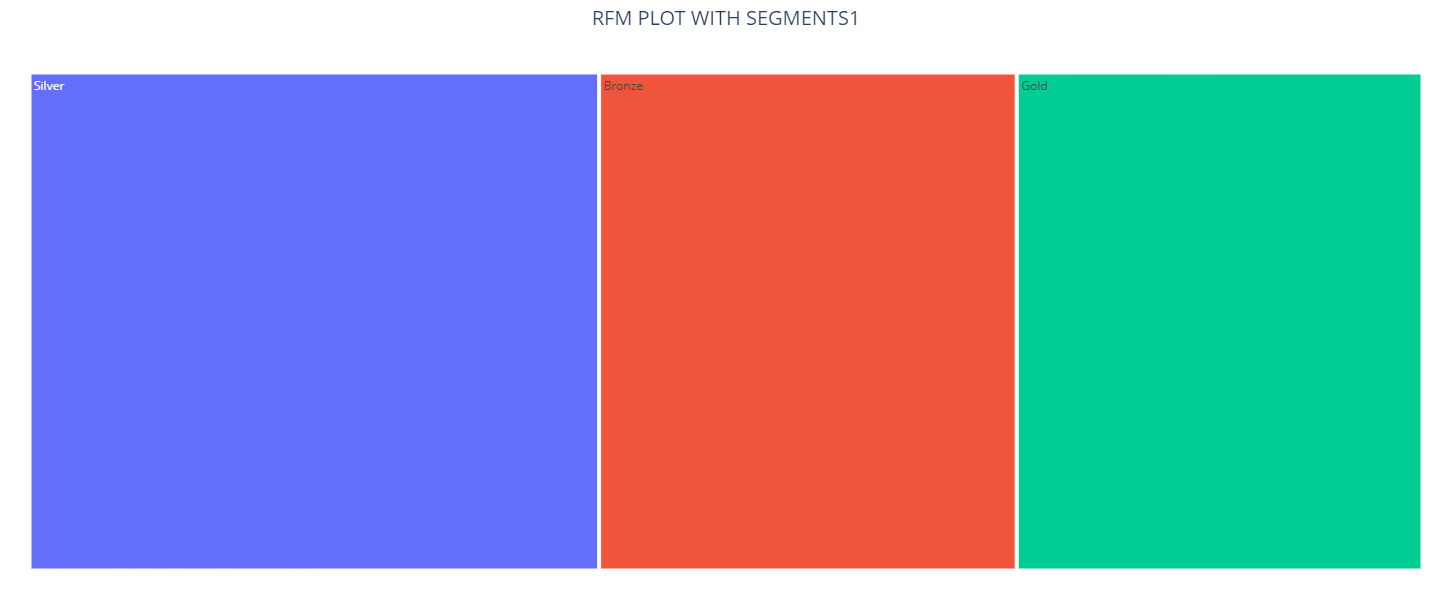

In [141]:
# PLOTLY TREEMAP

fig = px.treemap(df_plot1,
                 path=[df_plot1.Segments], 
                 values='Customers', 
                 width=1000, 
                 height=600)
fig.update_layout(title="RFM PLOT WITH SEGMENTS1",
                  title_x = 0.5, title_font = dict(size=20),
                 )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

- *Segments2*

In [142]:
df_plot2 = pd.DataFrame(df_rfm_table["segments2"].value_counts(dropna=False).sort_values(ascending=False)).reset_index().rename(columns={'index':'Segments', 'segments2':'Customers'})
df_plot2

Segments  Customers
0                    Champions       1179
1                         Lost        716
2              Loyal Customers        583
3               Still Got Hope        513
4           Potential Loyalist        354
5  Customers Needing Attention        215
6        Need to Get Them Back        163
7                Give it a Try        100
8             Recent Customers         97

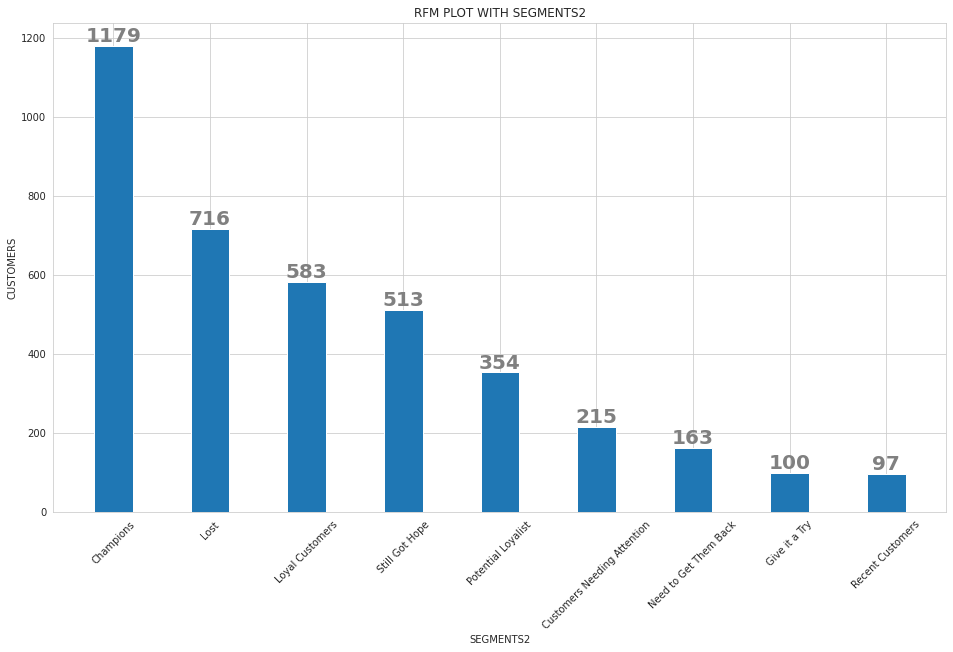

In [143]:
# MATPLOTLIB
y = df_plot2.Customers.values
x = df_plot2.Segments.values

fig, ax = plt.subplots(figsize = (16,9), dpi=72)
ax.bar(x,y,width=0.4)

plt.title("RFM PLOT WITH SEGMENTS2")
plt.xlabel("SEGMENTS2");
plt.ylabel("CUSTOMERS");
plt.xticks(rotation = 45)

for index,value in enumerate(y):
    plt.text(x=index , y =value , s=str(value) , ha="center", va="bottom", color = 'gray', fontweight = 'bold', fontdict=dict(fontsize=20))
plt.show()

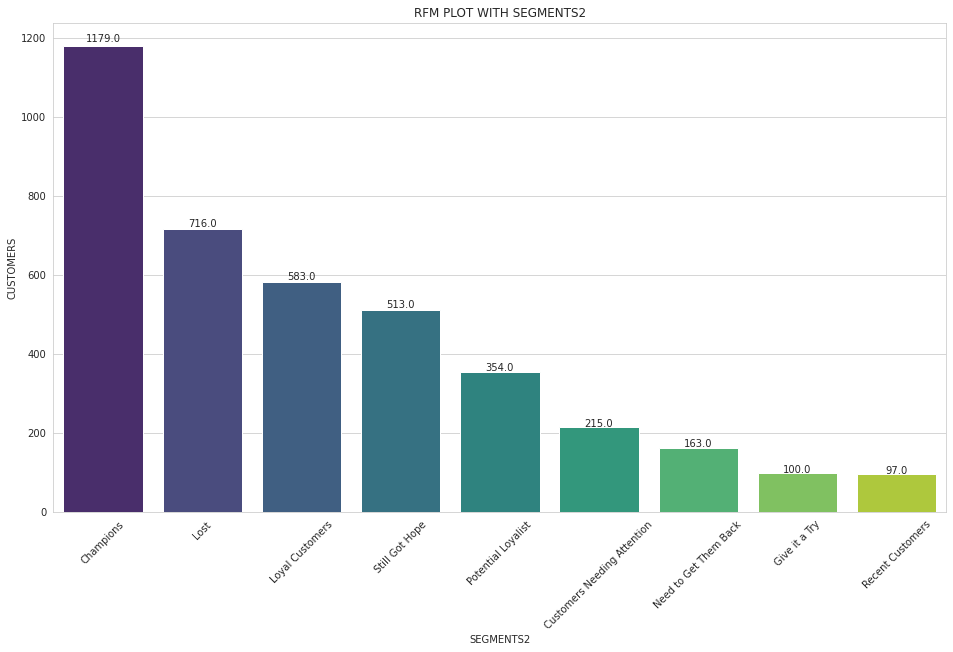

In [144]:
# SEABORN

plt.figure(figsize=(16, 9))
plt.title("RFM PLOT WITH SEGMENTS2")
ax = sns.barplot(data = df_plot2, x = 'Segments', y = 'Customers', palette = 'viridis')
plt.xticks(rotation = 45)
ax.set(xlabel='SEGMENTS2', ylabel='CUSTOMERS')
show_values(ax);

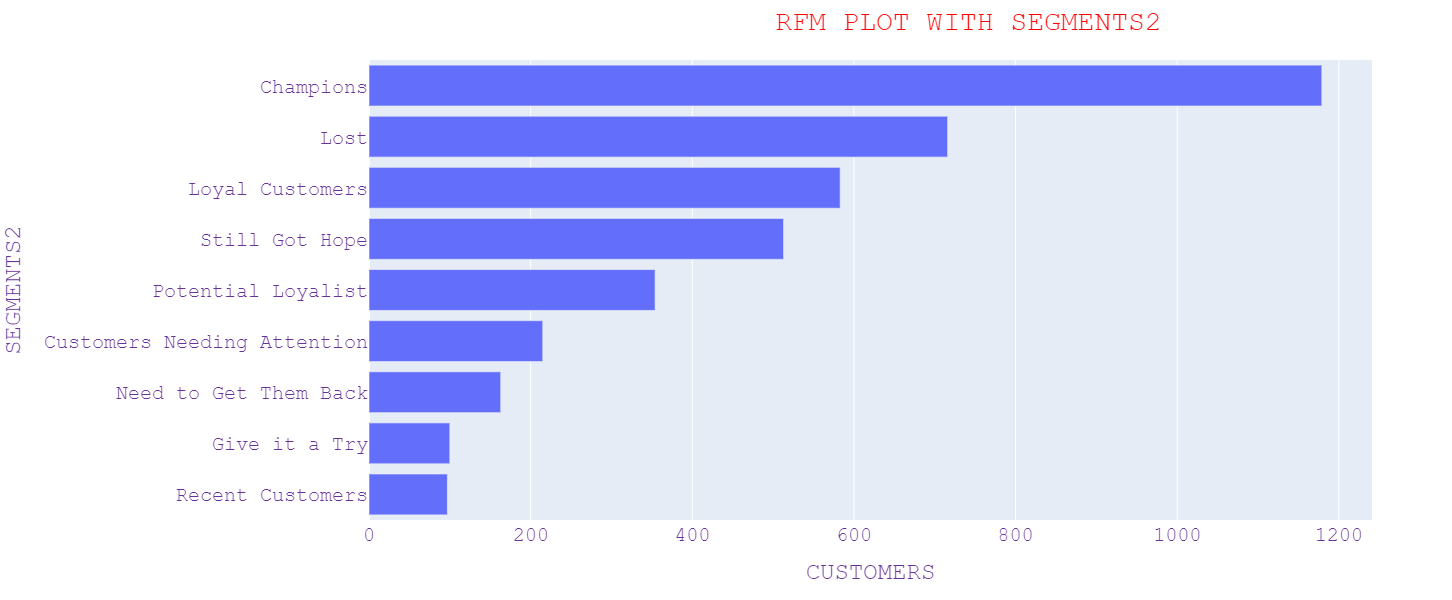

In [145]:
# PLOTLY

fig = px.bar(df_plot2, x = "Customers", y = "Segments", width=950, height=600)
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(title="RFM PLOT WITH SEGMENTS2", yaxis_title="SEGMENTS2", xaxis_title="CUSTOMERS", legend_title="Segments2", title_font_color="red", title_x=0.8,
                  font=dict(family="Courier New, monospace", size=20, color="RebeccaPurple")
                 )
fig.show()

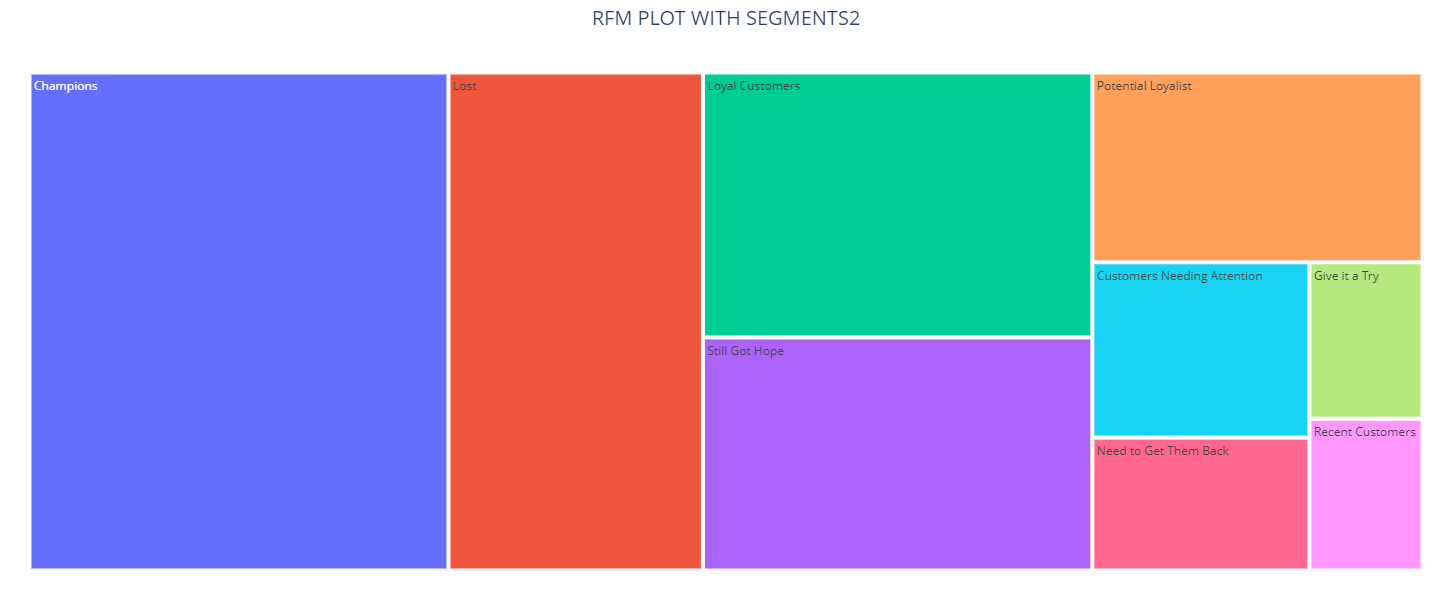

In [146]:
# PLOTLY TREEMAP

fig = px.treemap(df_plot2,
                 path=[df_plot2.Segments], 
                 values='Customers', 
                 width=1000, 
                 height=600)
fig.update_layout(title="RFM PLOT WITH SEGMENTS2",
                  title_x = 0.5, title_font = dict(size=20),
                 )
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [147]:
df_plot2

Segments  Customers
0                    Champions       1179
1                         Lost        716
2              Loyal Customers        583
3               Still Got Hope        513
4           Potential Loyalist        354
5  Customers Needing Attention        215
6        Need to Get Them Back        163
7                Give it a Try        100
8             Recent Customers         97

In [148]:
list(df_plot2['Customers'].values)

[1179, 716, 583, 513, 354, 215, 163, 100, 97]

In [149]:
list(df_plot2["Segments"].values)

['Champions',
 'Lost',
 'Loyal Customers',
 'Still Got Hope',
 'Potential Loyalist',
 'Customers Needing Attention',
 'Need to Get Them Back',
 'Give it a Try',
 'Recent Customers']

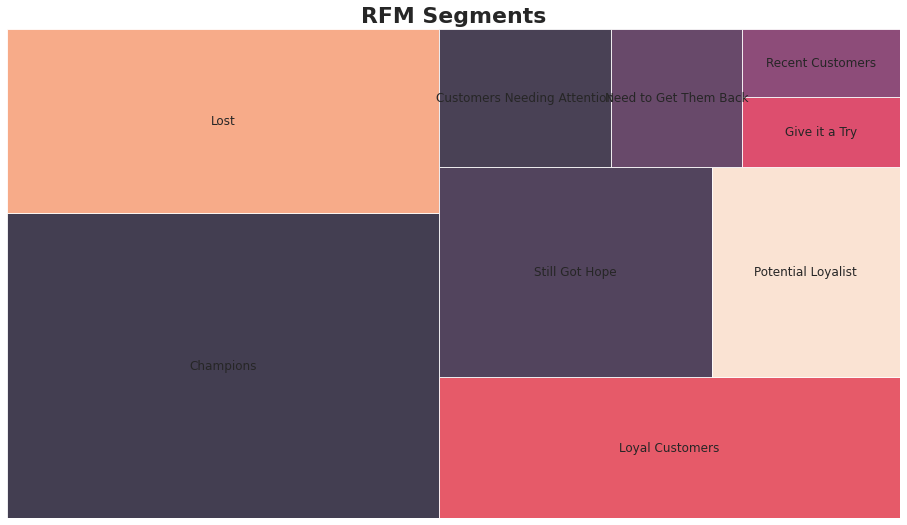

In [150]:
# MATPLOTLIB SQUARIFY

import squarify

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=list(df_plot2['Customers'].values), 
              label=list(df_plot2['Segments'].values), alpha=0.8,
              text_kwargs={'fontsize':12})
plt.title("RFM Segments",fontsize=22,fontweight="bold")
plt.axis('off')
plt.show()


Using customer segmentation categories found [here](http://www.blastam.com/blog/rfm-analysis-boosts-sales) we can formulate different marketing strategies and approaches for customer engagement for each type of customer.

Note: The author in the article scores 1 as the highest and 4 as the lowest

2. How many customers do we have in each segment?

In [151]:
df_rfm_table.head(2)

recency  frequency  monetary  recency_quantile  \
customerid                                                   
17850.000       372        297  5391.210                 1   
13047.000        31        172  3237.540                 3   

            frequency_quantile  monetary_quantile rfm_score  rfm_level  \
customerid                                                               
17850.000                    4                  4       144          9   
13047.000                    4                  4       344         11   

           segments1              segments2  
customerid                                   
17850.000     Silver  Need to Get Them Back  
13047.000       Gold              Champions

In [152]:
df_rfm_table[(df_rfm_table["segments1"] == "Gold")][["segments1","segments2"]].sample(5)

segments1  segments2
customerid                     
13588.000       Gold  Champions
13571.000       Gold  Champions
16393.000       Gold  Champions
13700.000       Gold  Champions
13736.000       Gold  Champions

In [153]:
df_rfm_table[(df_rfm_table["segments1"] == "Silver")][["segments1","segments2"]].sample(5)

segments1           segments2
customerid                              
16446.000     Silver    Recent Customers
15318.000     Silver  Potential Loyalist
13049.000     Silver      Still Got Hope
16573.000     Silver     Loyal Customers
16406.000     Silver     Loyal Customers

In [154]:
df_rfm_table[(df_rfm_table["segments1"] == "Bronze")][["segments1","segments2"]].sample(5)

segments1       segments2
customerid                          
15335.000     Bronze  Still Got Hope
17895.000     Bronze  Still Got Hope
17967.000     Bronze   Give it a Try
16276.000     Bronze   Give it a Try
14220.000     Bronze            Lost

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">4. Applying K-Means Clustering</font></span> <a id="7"></a>

Now that we have our customers segmented into 6 different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.
Possible algorithms include **Logistic Regression**, **K-means Clustering**, and **K-nearest Neighbor**. We will go with [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) since we already have our distinct groups determined. K-means has also been widely used for market segmentation and has the advantage of being simple to implement.

## <span style="color:#9C27B0; opacity:1"><font size="5">4.1 Data Pre-Processing and Exploring</font></span> <a id="7.1"></a>

In [155]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [156]:
df_rfm_table.head()

recency  frequency  monetary  recency_quantile  \
customerid                                                   
17850.000       372        297  5391.210                 1   
13047.000        31        172  3237.540                 3   
13748.000        95         28   948.250                 2   
15100.000       333          3   876.000                 1   
15291.000        25        103  4668.300                 3   

            frequency_quantile  monetary_quantile rfm_score  rfm_level  \
customerid                                                               
17850.000                    4                  4       144          9   
13047.000                    4                  4       344         11   
13748.000                    2                  3       223          7   
15100.000                    1                  3       113          5   
15291.000                    4                  4       344         11   

           segments1                    segments2  
customerid                                         
17850.000     Silver        Need to Get Them Back  
13047.000       Gold                    Champions  
13748.000     Silver  Customers Needing Attention  
15100.000     Bronze                Give it a Try  
15291.000       Gold                    Champions

In [157]:
df_rfm_table.groupby('rfm_level').agg(
                                 {'recency': ['mean','min','max','count'],
                                  'frequency': ['mean','min','max','count'],
                                  'monetary': ['mean','min','max','count']}
                                ).round(1)

recency                 frequency                 monetary           \
             mean  min  max count      mean min   max count     mean      min   
rfm_level                                                                       
3         258.100  143  373   343     8.100   1    17   343  151.900    3.800   
4         175.400   51  373   361    13.600   1    39   361  233.500    6.200   
5         151.400   18  373   471    20.500   1    84   471  354.700    6.900   
6          97.200    1  373   426    28.200   1    98   426  825.200   35.400   
7          78.600    1  358   387    38.400   1   123   387  734.100  114.300   
8          60.100    0  338   413    54.500   3   248   413  906.400  120.000   
9          46.900    0  372   377    77.700   1   521   377 1792.500  271.200   
10         32.300    0  140   387   111.100  20   400   387 1914.700  302.100   
11         20.100    0   50   348   182.300  41  1175   348 3434.500  653.200   
12          6.600    0   17   407   360.500  99  7676   407 8254.600 1581.800   

                            
                 max count  
rfm_level                   
3            298.100   343  
4            635.700   361  
5           1308.500   471  
6          77183.600   426  
7           7374.900   387  
8           6912.000   413  
9         168472.500   377  
10         42056.000   387  
11         80850.800   348  
12        259657.300   407

## <span style="color:#9C27B0; opacity:1"><font size="5">4.2 Define and Plot Feature Correlations</font></span> <a id="7.2"></a>

Create Heatmap and evaluate the results 

In [158]:
df_rfm_table.corr()

recency  frequency  monetary  recency_quantile  \
recency               1.000     -0.213    -0.129            -0.861   
frequency            -0.213      1.000     0.330             0.266   
monetary             -0.129      0.330     1.000             0.174   
recency_quantile     -0.861      0.266     0.174             1.000   
frequency_quantile   -0.444      0.409     0.197             0.469   
monetary_quantile    -0.444      0.353     0.261             0.457   
rfm_level            -0.696      0.409     0.251             0.766   

                    frequency_quantile  monetary_quantile  rfm_level  
recency                         -0.444             -0.444     -0.696  
frequency                        0.409              0.353      0.409  
monetary                         0.197              0.261      0.251  
recency_quantile                 0.469              0.457      0.766  
frequency_quantile               1.000              0.736      0.877  
monetary_quantile                0.736              1.000      0.872  
rfm_level                        0.877              0.872      1.000

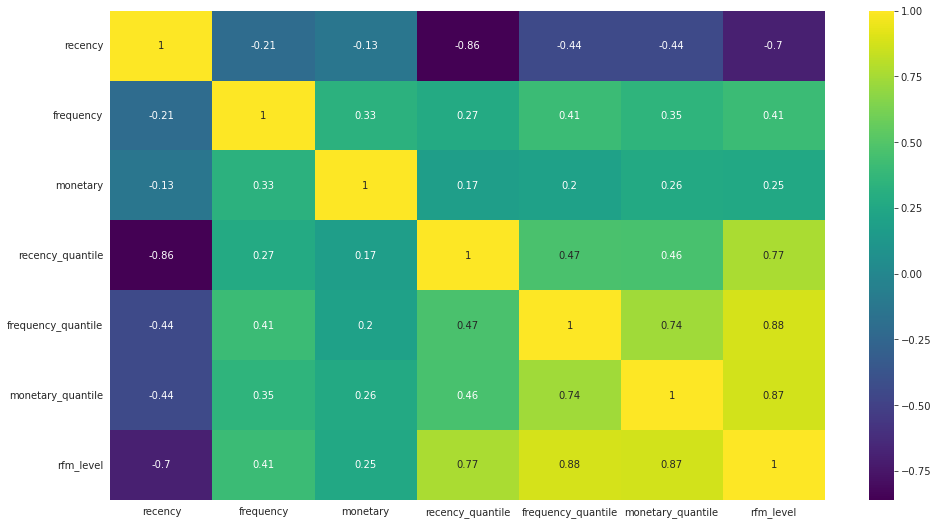

In [159]:
plt.figure(figsize=(16,9))
sns.heatmap(data = df_rfm_table.corr(), annot=True, cmap = 'viridis');

## <span style="color:#9C27B0; opacity:1"><font size="5">4.3 Visualize Feature Distributions</font></span> <a id="7.3"></a>

To get a better understanding of the dataset, you can costruct a scatter matrix of each of the three features in the RFM data.

- "*segments1*"

<Figure size 1440x720 with 0 Axes>

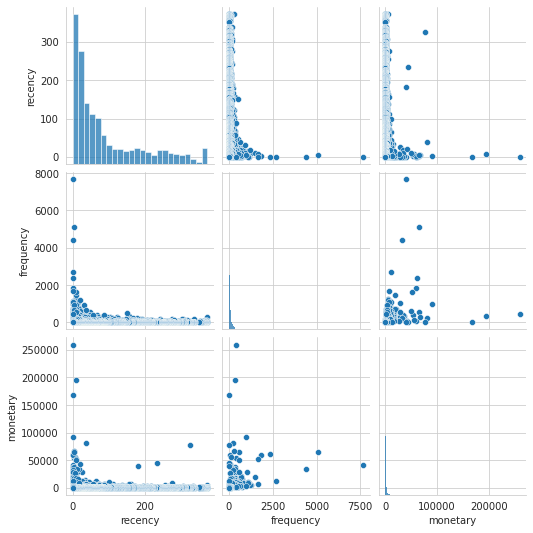

In [160]:
plt.figure(figsize=(20,10))
sns.pairplot(df_rfm_table[['recency', 'frequency', 'monetary','segments1']]);

<Figure size 1440x720 with 0 Axes>

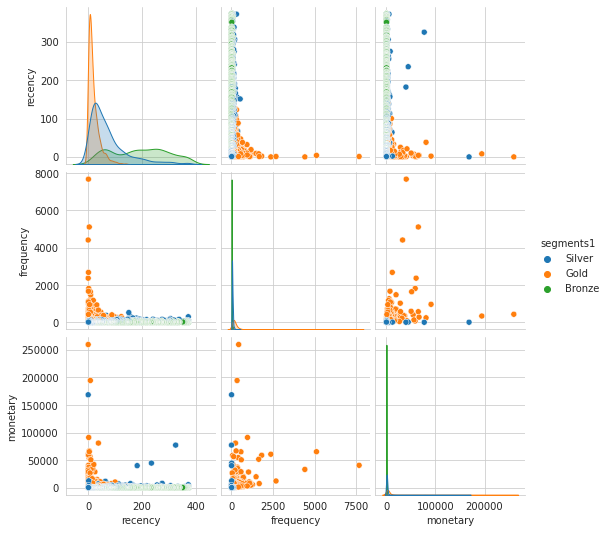

In [161]:
plt.figure(figsize=(20,10))
sns.pairplot(df_rfm_table[['recency', 'frequency', 'monetary','segments1']],hue='segments1');

- "*segments2*"

<Figure size 1440x720 with 0 Axes>

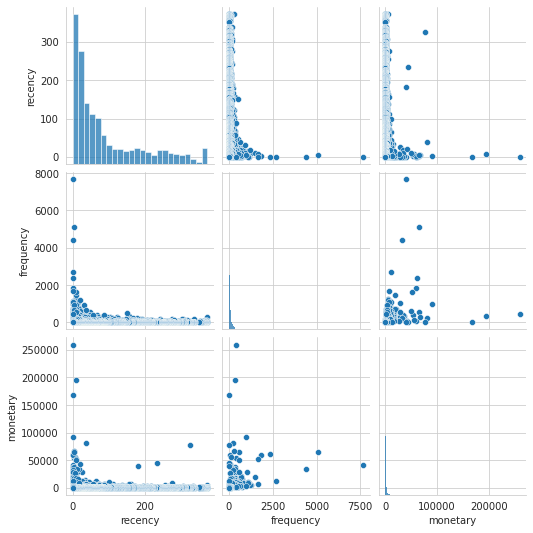

In [162]:
plt.figure(figsize=(20,10))
sns.pairplot(df_rfm_table[['recency', 'frequency', 'monetary','segments2']]);

<Figure size 1440x720 with 0 Axes>

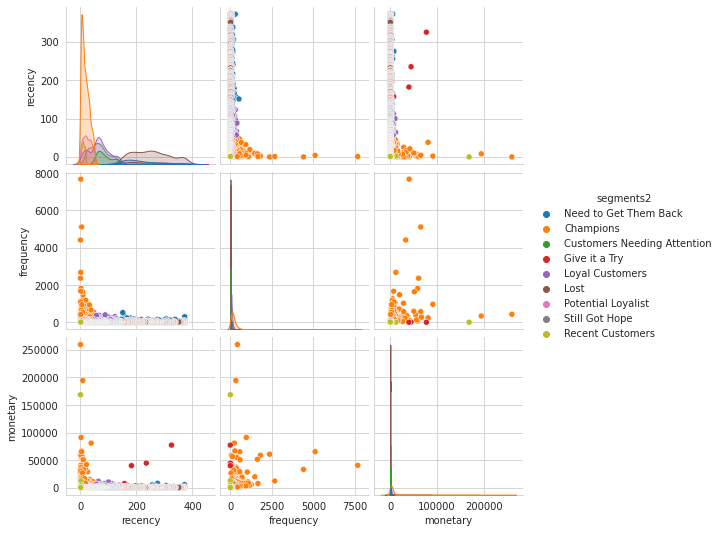

In [163]:
plt.figure(figsize=(20,10))
sns.pairplot(df_rfm_table[['recency', 'frequency', 'monetary','segments2']], hue = "segments2");

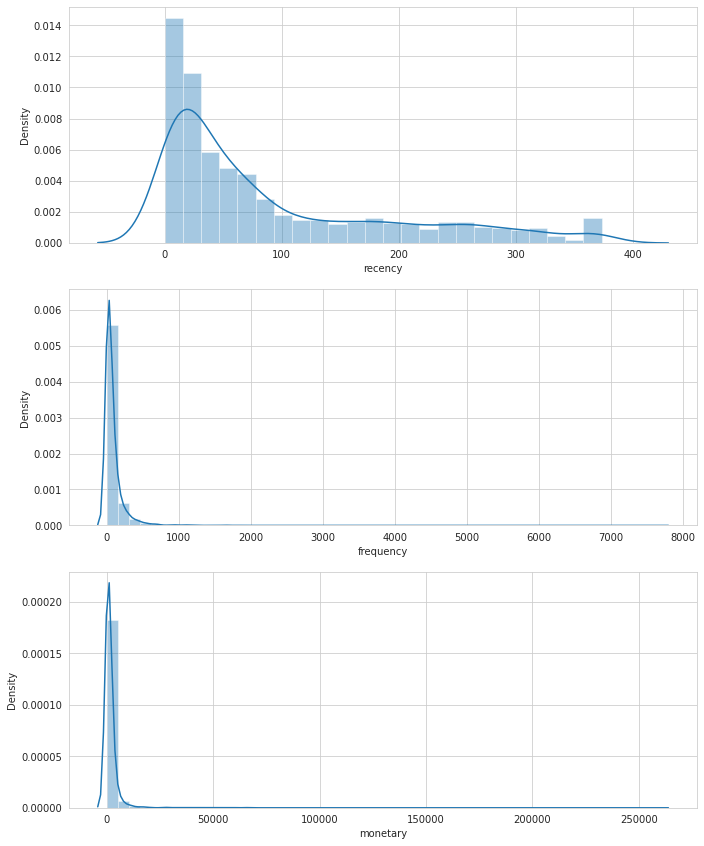

In [164]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(df_rfm_table["recency"], label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(df_rfm_table["frequency"], label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(df_rfm_table["monetary"], label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

## <span style="color:#9C27B0; opacity:1"><font size="5">4.4 Data Normalization</font></span> <a id="7.4"></a>

1. You can use the logarithm method to normalize the values in a column.

- COMPARISON OF LOG() AND LOG1P()
- For real-valued input, log1p is accurate also for x so small that 1 + x == 1 in floating-point accuracy.<br>
The log() function computes the value of the natural logarithm of argument x.<br>
The log1p() function computes the value of log(1+x) accurately even for tiny argument x.

In [165]:
compare = {'log1p': df_rfm_table['recency'].apply(np.log1p).values,
           'log'  : (df_rfm_table['recency'] + 0.1).apply(np.log).values}

pd.DataFrame(compare, index = df_rfm_table.index)

log1p   log
customerid             
17850.000   5.922 5.919
13047.000   3.466 3.437
13748.000   4.564 4.555
15100.000   5.811 5.808
15291.000   3.258 3.223
...           ...   ...
15471.000   1.099 0.742
13436.000   0.693 0.095
15520.000   0.693 0.095
13298.000   0.693 0.095
14569.000   0.693 0.095

[3920 rows x 2 columns]

In [166]:
rfm_log = df_rfm_table[['recency', 'frequency', 'monetary']].apply(np.log1p).round(3)
rfm_log

recency  frequency  monetary
customerid                              
17850.000     5.922      5.697     8.593
13047.000     3.466      5.153     8.083
13748.000     4.564      3.367     6.856
15100.000     5.811      1.386     6.777
15291.000     3.258      4.644     8.449
...             ...        ...       ...
15471.000     1.099      4.304     6.121
13436.000     0.693      2.565     5.288
15520.000     0.693      2.944     5.842
13298.000     0.693      1.099     5.889
14569.000     0.693      2.565     5.431

[3920 rows x 3 columns]

2. Plot normalized data with scatter matrix or pairplot. Also evaluate results.

<Figure size 1440x720 with 0 Axes>

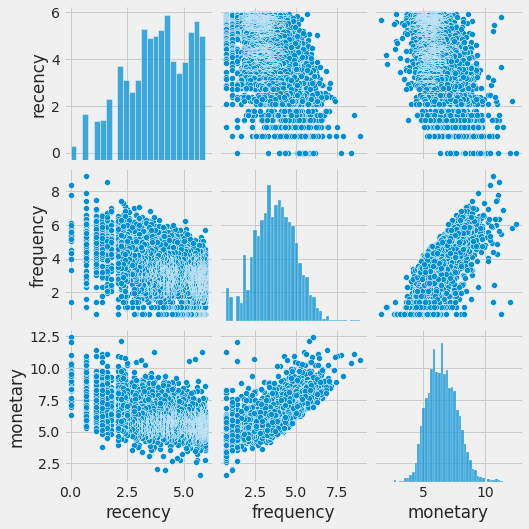

In [167]:
plt.figure(figsize=(20,10))
sns.pairplot(data = rfm_log);

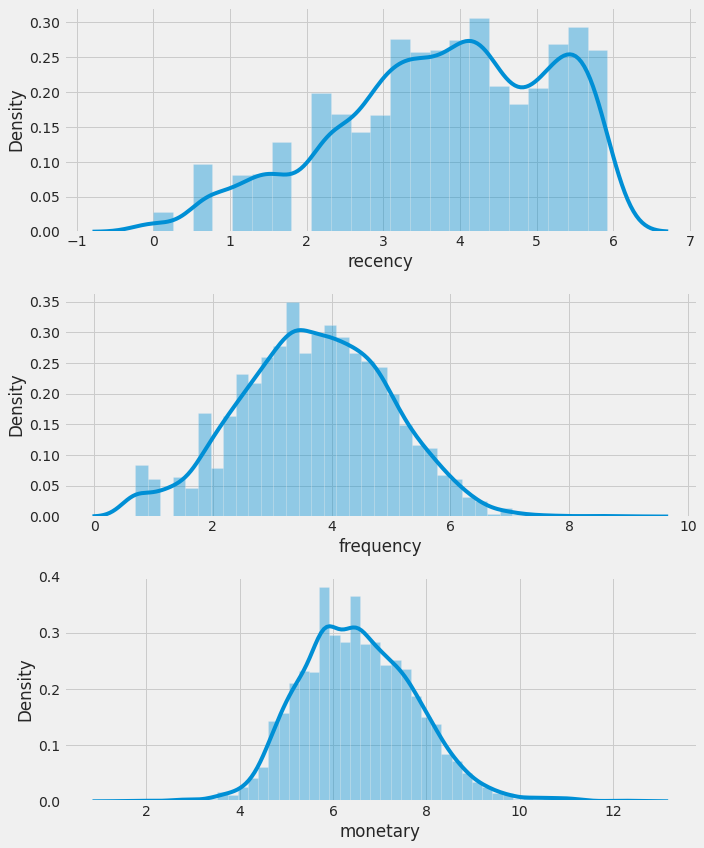

In [168]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_log.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_log.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_log.monetary, label = 'Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [169]:
#Normalize the variables with StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_log)
#Store it separately for clustering
rfm_normalized= scaler.transform(rfm_log)

## <span style="color:#9C27B0; opacity:1"><font size="5">4.5 K-Means Implementation</font></span> <a id="7.5"></a>

For k-means, you have to set k to the number of clusters you want, but figuring out how many clusters is not obvious from the beginning. We will try different cluster numbers and check their [silhouette coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html). The silhouette coefficient for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). 
<br>
<br>
**Note**: K-means is sensitive to initializations because they are critical to qualifty of optima found. Thus, we will use smart initialization called "Elbow Method".

In [170]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

## <span style="color:#9C27B0; opacity:1"><font size="5">4.6 Define Optimal Cluster Number (K) by using "Elbow Method" and "Silhouette Analysis"</font></span> <a id="7.6"></a>

## Define the Optimal Number of Clusters
- The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set. It belongs to the family of sparse sampling tests. It acts as a statistical hypothesis test where the null hypothesis is that the data is generated by a Poisson point process and are thus uniformly randomly distributed. 
- **A value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.**

In [171]:
hopkins(rfm_log,rfm_log.shape[0])

0.10046861118395524

- Our Hopkins value is too close to 0 which means we have a dataset which has a quite small tendency to clustering. We need to further analyse with silouhette scores whether our data has a tendency to clustering or not.

[The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering) 

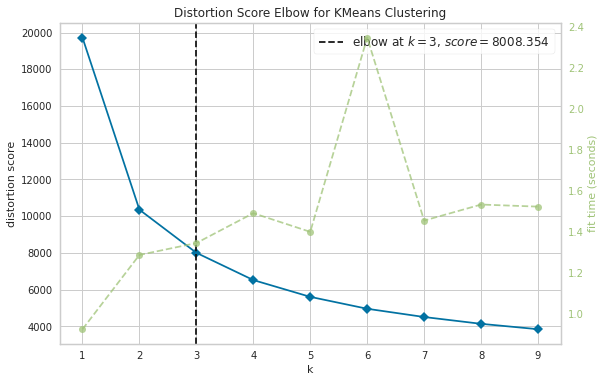

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [172]:
plt.rcParams['figure.facecolor'] = 'white'
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(rfm_log)        # Fit the data to the visualizer
visualizer.show() 

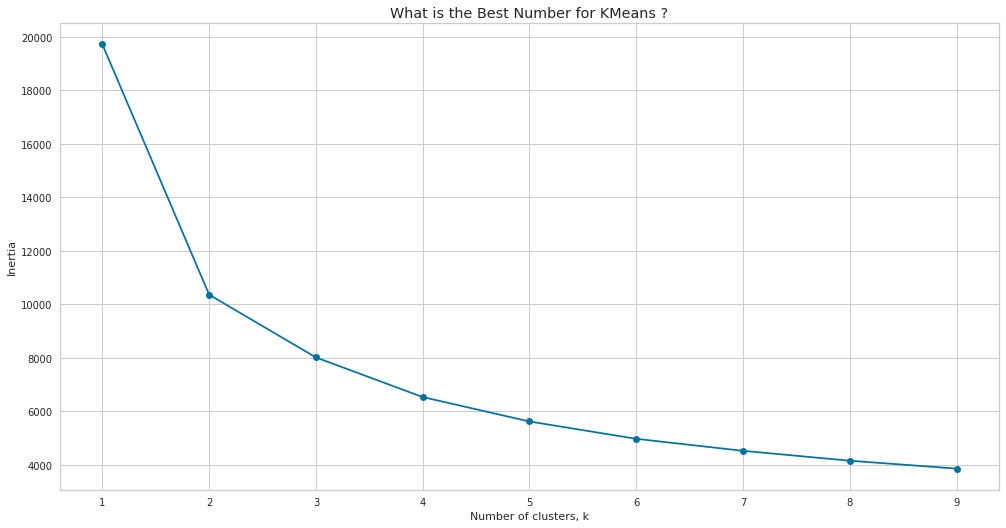

In [173]:
#First : Get the Best KMeans 
ks = range(1,10)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfm_log)
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

[Silhouette Coefficient](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [174]:
for k in range(2,10):

    model = KMeans(n_clusters=k)  #  random_state=10
    cluster_labels = model.fit_predict(rfm_log)
    
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_score(rfm_log, cluster_labels))

For n_clusters = 2 The average silhouette_score is : 0.3990938093330011
For n_clusters = 3 The average silhouette_score is : 0.30462434189964277
For n_clusters = 4 The average silhouette_score is : 0.3111761990621714
For n_clusters = 5 The average silhouette_score is : 0.27722955182468506
For n_clusters = 6 The average silhouette_score is : 0.2779611290426423
For n_clusters = 7 The average silhouette_score is : 0.26188018345559216
For n_clusters = 8 The average silhouette_score is : 0.26000811658666223
For n_clusters = 9 The average silhouette_score is : 0.26045098679826995


In [175]:
# ANOTHER WAY

ssd =[]

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(rfm_log)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(rfm_log, model.labels_)}')

Silhouette Score for 2 clusters: 0.39861468317855914
Silhouette Score for 3 clusters: 0.30496609523238255
Silhouette Score for 4 clusters: 0.31125758782517615
Silhouette Score for 5 clusters: 0.27663273356631624
Silhouette Score for 6 clusters: 0.2772214957936153
Silhouette Score for 7 clusters: 0.26288206139587894
Silhouette Score for 8 clusters: 0.26085221263791053
Silhouette Score for 9 clusters: 0.2603854662654565


- Silhouette_score decreases as the level of detail increases, that is, as the number of clusters (n_clusters) increases.
- From this, the following conclusions can be drawn: Our first finding regarding the clustering tendency is supported by the score that we obtained with the Hopkins method, which we found to be very close to zero.
- For the clustering, we will choose the **n_clusters=3** that have an acceptable elbow score.<br>
(The Yellowbrick Elbow method recommends 3 clusters, but the silhouette score is too low for 3 n_clouster.)

##  Model Fitting

Fit the K-Means Algorithm with the optimal number of clusters you decided and save the model to disk.

In [176]:
kmeans = KMeans(n_clusters = 3).fit(rfm_log)
labels = kmeans.labels_
rfm_log['labels']=labels

rfm_log.head()

recency  frequency  monetary  labels
customerid                                      
17850.000     5.922      5.697     8.593       2
13047.000     3.466      5.153     8.083       1
13748.000     4.564      3.367     6.856       2
15100.000     5.811      1.386     6.777       0
15291.000     3.258      4.644     8.449       1

## <span style="color:#9C27B0; opacity:1"><font size="5">4.7 Visualize the Clusters</font></span> <a id="7.7"></a>

1. Create a scatter plot and select cluster centers

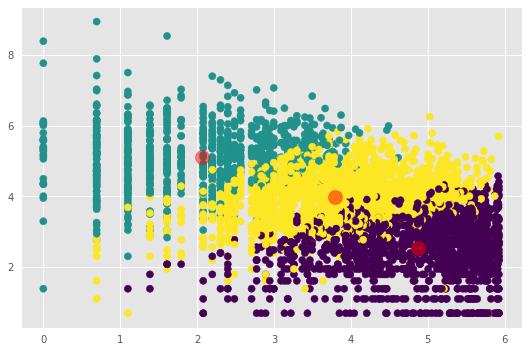

In [177]:
plt.scatter(rfm_log.iloc[:,0], rfm_log.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red',alpha=0.5, label = 'Centroids')

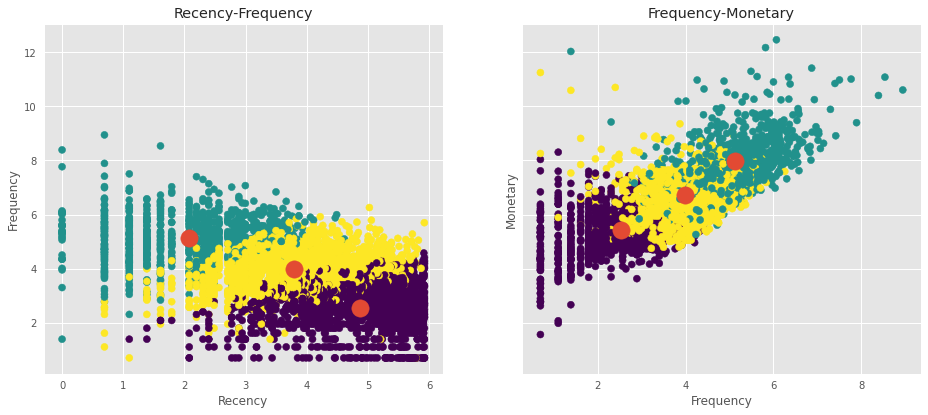

In [178]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (14,6)) # sharey=True and y-axis labels are used in common.
ax1.set_title('Recency-Frequency')
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.scatter(rfm_log["recency"], rfm_log["frequency"], c = kmeans.labels_, cmap = "viridis")
ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, alpha = 1, label = 'Centroids')

ax2.set_title("Frequency-Monetary")
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Monetary')
ax2.scatter(rfm_log["frequency"], rfm_log["monetary"], c = kmeans.labels_, cmap ="viridis")
ax2.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 300, alpha = 1, label = 'Centroids');

2. Visualize Cluster Id vs Recency, Cluster Id vs Frequency and Cluster Id vs Monetary using Box plot. Also evaluate the results. 

In [179]:
rfm_log.columns

Index(['recency', 'frequency', 'monetary', 'labels'], dtype='object')

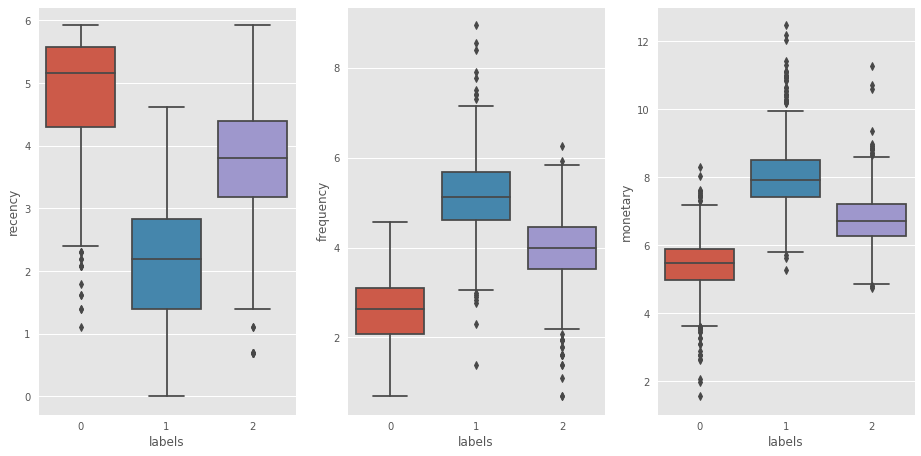

In [180]:
plt.figure(figsize = (14,7))

plt.subplot(1,3,1)
sns.boxplot(rfm_log['labels'], rfm_log['recency'])

plt.subplot(1,3,2)
sns.boxplot(rfm_log['labels'], rfm_log['frequency'])

plt.subplot(1,3,3)
sns.boxplot(rfm_log['labels'], rfm_log['monetary'])
plt.show()

## <span style="color:#9C27B0; opacity:1"><font size="5">4.8 Assign the Labels</font></span> <a id="7.8"></a>

In [181]:
rfm_log.head()

recency  frequency  monetary  labels
customerid                                      
17850.000     5.922      5.697     8.593       2
13047.000     3.466      5.153     8.083       1
13748.000     4.564      3.367     6.856       2
15100.000     5.811      1.386     6.777       0
15291.000     3.258      4.644     8.449       1

In [182]:
rfm_log["labels"].value_counts(dropna = False)

2    1635
0    1416
1     869
Name: labels, dtype: int64

In [205]:
# rfm_log['decision'] = rfm_log['labels'].map({1:'Best_Customers',2:'Almost_Lost',0:'Lost_Customers'})
rfm_log['decision'] = rfm_log['labels'].apply(lambda item: 'Best_Customers' if item == 1 else ("Lost_Customers" if item == 0 else "Almost_Lost"))
rfm_log.head() 

recency  frequency  monetary  labels        decision
customerid                                                      
17850.000     5.922      5.697     8.593       2     Almost_Lost
13047.000     3.466      5.153     8.083       1  Best_Customers
13748.000     4.564      3.367     6.856       2     Almost_Lost
15100.000     5.811      1.386     6.777       0  Lost_Customers
15291.000     3.258      4.644     8.449       1  Best_Customers

## <span style="color:#9C27B0; opacity:1"><font size="5">4.9 Conclusion</font></span> <a id="7.9"></a>

<p style="color:#EC407A; opacity:1; background-color:#FAFAFA"><font size="4.4">Be careful when determining the number of "n_clusters" and the expressions corresponding to the "labels" and "decision" columns, as my cluster analysis gives different results each time I run my notebook. Please consider the analysis of your own results as I did.</font></p> <a id="7.9"></a>


- Cluster 1 : The first cluster belongs to the "Best Customers" segment which we saw earlier as they purchase recently (R=4), frequent buyers (F=4), and spent the most (M=4)

- Cluster 2 : Second cluster can be interpreted as passer customers as their last purchase is long ago (R<=1),purchased very few (F>=2 & F < 4) and spent little (M>=4 & M < 4).Company has to come up with new strategies to make them permanent members. Low value customers
- Cluster 0 : The third cluster is more related to the "Almost Lost" segment as they Haven’t purchased for some time(R=1), but used to purchase frequently and spent a lot.

## <span style="color:#9C27B0; opacity:1"><font size="5">4.10 Discussion</font></span> <a id="7.10"></a>

How we want to continue this analysis depends on how the business plans to use the results and the level of granularity the business stakeholders want to see in the clusters. We can also ask what range of customer behavior from high to low value customers are the stakeholders interested in exploring. From those answers, various methods of clustering can be used and applied on RFM variable or directly on the transaction data set.

**Annotation:**

Limitations of K-means clustering:

1. There is no assurance that it will lead to the global best solution.
2. Can't deal with different shapes(not circular) and consider one point's probability of belonging to more than one cluster.

These disadvantages of K-means show that for many datasets (especially low-dimensional datasets), it may not perform as well as you might hope.

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">5. Create Cohort and Conduct Cohort Analysis</font></span> <a id="8"></a>

[Cohort Analysis](https://medium.com/swlh/cohort-analysis-using-python-and-pandas-d2a60f4d0a4d) is specifically useful in analyzing user growth patterns for products. In terms of a product, a cohort can be a group of people with the same sign-up date, the same usage starts month/date, or the same traffic source.
Cohort analysis is an analytics method by which these groups can be tracked over time for finding key insights. This analysis can further be used to do customer segmentation and track metrics like retention, churn, and lifetime value.

For e-commerce organizations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business. by performing Cohort analysis you can get the following answers to the following questions:

- How much effective was a marketing campaign held in a particular time period?
- Did the strategy employ to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in Customer behavior?
- Along with various performance measures/metrics for your organization.

Since we will be performing Cohort Analysis based on transaction records of customers, the columns we will be dealing with mainly:
- Invoice Data
- CustomerID
- Price
- Quantity

The following steps will performed to generate the Cohort Chart of Retention Rate:
- Month Extraction from InvioceDate column
- Assigning Cohort to Each Transaction
- Assigning Cohort Index to each transaction
- Calculating number of unique customers in each Group of (ChortDate,Index)
- Creating Cohort Table for Retention Rate
- Creating the Cohort Chart using the Cohort Table

The Detailed information about each step is given below:

## <span style="color:#9C27B0; opacity:1"><font size="5">5.1 Future Engineering</font></span> <a id="8.1"></a>

## <span style="color:#9C27B0; opacity:1"><font size="5">5.2 Extract the Month of the Purchase</font></span> <a id="8.2"></a>

First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [206]:
df_cohort = df
df_cohort.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   

         date invoicemonth cohortmonth  CohortIndex  
0  2010-12-01   2010-12-01  2010-12-01            1  
1  2010-12-01   2010-12-01  2010-12-01            1  
2  2010-12-01   2010-12-01  2010-12-01            1  
3  2010-12-01   2010-12-01  2010-12-01            1  
4  2010-12-01   2010-12-01  2010-12-01            1

In [207]:
import datetime as dt
def take_months(x) : 
    return dt.datetime(x.year,x.month,1)

Now we will use the function created above to convert all the invoice dates into respective month date format.

In [208]:
df_cohort['invoicemonth'] = df_cohort['invoicedate'].apply(take_months)
df_cohort[["invoicemonth"]].head(2)

invoicemonth
0   2010-12-01
1   2010-12-01

In [209]:
df_cohort['cohortmonth'] = df_cohort.groupby('customerid')['invoicemonth'].transform('min')
df_cohort[['cohortmonth']].head(2)

cohortmonth
0  2010-12-01
1  2010-12-01

- 2nd Way

In [210]:
# def first_of_month(date):    
#     formatted_date = dt.datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S')
#     return dt.datetime(formatted_date.year, formatted_date.month, 1)

# df_cohort['invoicemonth'] = df_cohort['invoicedate'].apply(first_of_month)
# df_cohort['cohortmonth'] = df_cohort.groupby('customerid')['invoicemonth'].transform('min')

## <span style="color:#9C27B0; opacity:1"><font size="5">5.3 Calculating time offset in Months i.e. Cohort Index:</font></span> <a id="8.3"></a>

Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.
First, you will create 4 variables that capture the integer value of years, months for Invoice and Cohort Date using the get_date_int() function which you'll create it below.

In [211]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

You will use this function to extract the integer values for Invoice as well as Cohort Date in 3 seperate series for each of the two columns

In [212]:
invoice_year, invoice_month, invoice_day = get_month_int(df_cohort, 'invoicemonth')
cohort_year, cohort_month, cohort_day = get_month_int(df_cohort, 'cohortmonth')

Use the variables created above to calcualte the difference in days and store them in cohort Index column.

In [213]:
year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df_cohort['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [214]:
df_cohort.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550   17850.000  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750   17850.000  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390   17850.000  United Kingdom       20.340   

         date invoicemonth cohortmonth  CohortIndex  
0  2010-12-01   2010-12-01  2010-12-01            1  
1  2010-12-01   2010-12-01  2010-12-01            1  
2  2010-12-01   2010-12-01  2010-12-01            1  
3  2010-12-01   2010-12-01  2010-12-01            1  
4  2010-12-01   2010-12-01  2010-12-01            1

## <span style="color:#9C27B0; opacity:1"><font size="5">5.4 Create 1st Cohort: User number & Retention Rate</font></span> <a id="8.4"></a>

### <span style="color:#19A4E6; opacity:1"><font size="4">5.4.1 Pivot Cohort and Cohort Retention</font></span> <a id="8.4.1"></a>

In [215]:
#Count monthly active customers from each cohort
cohort1 = df_cohort.groupby(['cohortmonth', 'CohortIndex'])['customerid'].nunique().reset_index()
cohort1.head()

cohortmonth  CohortIndex  customerid
0  2010-12-01            1         885
1  2010-12-01            2         324
2  2010-12-01            3         286
3  2010-12-01            4         340
4  2010-12-01            5         321

In [216]:
# Return number of unique elements in the object.
pivot_cohort1 = cohort1.reset_index().pivot(index='cohortmonth',columns='CohortIndex',values='customerid').round(1)
pivot_cohort1

CohortIndex      1       2       3       4       5       6       7       8   \
cohortmonth                                                                   
2010-12-01  885.000 324.000 286.000 340.000 321.000 352.000 321.000 309.000   
2011-01-01  417.000  92.000 111.000  96.000 134.000 120.000 103.000 101.000   
2011-02-01  380.000  71.000  71.000 108.000 103.000  94.000  96.000 106.000   
2011-03-01  452.000  68.000 114.000  90.000 101.000  76.000 121.000 104.000   
2011-04-01  300.000  64.000  61.000  63.000  59.000  68.000  65.000  78.000   
2011-05-01  284.000  54.000  49.000  49.000  59.000  66.000  75.000  27.000   
2011-06-01  242.000  42.000  38.000  64.000  56.000  81.000  23.000     NaN   
2011-07-01  188.000  34.000  39.000  42.000  51.000  21.000     NaN     NaN   
2011-08-01  169.000  35.000  42.000  41.000  21.000     NaN     NaN     NaN   
2011-09-01  299.000  70.000  90.000  34.000     NaN     NaN     NaN     NaN   
2011-10-01  358.000  86.000  41.000     NaN     NaN     NaN     NaN     NaN   
2011-11-01  323.000  36.000     NaN     NaN     NaN     NaN     NaN     NaN   
2011-12-01   41.000     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

CohortIndex      9       10      11      12      13  
cohortmonth                                          
2010-12-01  313.000 350.000 331.000 445.000 235.000  
2011-01-01  125.000 136.000 152.000  49.000     NaN  
2011-02-01   94.000 116.000  26.000     NaN     NaN  
2011-03-01  126.000  39.000     NaN     NaN     NaN  
2011-04-01   22.000     NaN     NaN     NaN     NaN  
2011-05-01      NaN     NaN     NaN     NaN     NaN  
2011-06-01      NaN     NaN     NaN     NaN     NaN  
2011-07-01      NaN     NaN     NaN     NaN     NaN  
2011-08-01      NaN     NaN     NaN     NaN     NaN  
2011-09-01      NaN     NaN     NaN     NaN     NaN  
2011-10-01      NaN     NaN     NaN     NaN     NaN  
2011-11-01      NaN     NaN     NaN     NaN     NaN  
2011-12-01      NaN     NaN     NaN     NaN     NaN

In [217]:
sizes = pivot_cohort1.iloc[:, 0]
retention = pivot_cohort1.divide(sizes, axis=0).round(3)*100  #axis=0 to ensure the divide along the row axis
retention

CohortIndex      1      2      3      4      5      6      7      8      9   \
cohortmonth                                                                   
2010-12-01  100.000 36.600 32.300 38.400 36.300 39.800 36.300 34.900 35.400   
2011-01-01  100.000 22.100 26.600 23.000 32.100 28.800 24.700 24.200 30.000   
2011-02-01  100.000 18.700 18.700 28.400 27.100 24.700 25.300 27.900 24.700   
2011-03-01  100.000 15.000 25.200 19.900 22.300 16.800 26.800 23.000 27.900   
2011-04-01  100.000 21.300 20.300 21.000 19.700 22.700 21.700 26.000  7.300   
2011-05-01  100.000 19.000 17.300 17.300 20.800 23.200 26.400  9.500    NaN   
2011-06-01  100.000 17.400 15.700 26.400 23.100 33.500  9.500    NaN    NaN   
2011-07-01  100.000 18.100 20.700 22.300 27.100 11.200    NaN    NaN    NaN   
2011-08-01  100.000 20.700 24.900 24.300 12.400    NaN    NaN    NaN    NaN   
2011-09-01  100.000 23.400 30.100 11.400    NaN    NaN    NaN    NaN    NaN   
2011-10-01  100.000 24.000 11.500    NaN    NaN    NaN    NaN    NaN    NaN   
2011-11-01  100.000 11.100    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01  100.000    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex     10     11     12     13  
cohortmonth                              
2010-12-01  39.500 37.400 50.300 26.600  
2011-01-01  32.600 36.500 11.800    NaN  
2011-02-01  30.500  6.800    NaN    NaN  
2011-03-01   8.600    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN  
2011-06-01     NaN    NaN    NaN    NaN  
2011-07-01     NaN    NaN    NaN    NaN  
2011-08-01     NaN    NaN    NaN    NaN  
2011-09-01     NaN    NaN    NaN    NaN  
2011-10-01     NaN    NaN    NaN    NaN  
2011-11-01     NaN    NaN    NaN    NaN  
2011-12-01     NaN    NaN    NaN    NaN

- 2. WAY

In [218]:
# cohort_first = df_cohort.groupby(['cohortmonth', 'cohortindex'])['CustomerID'].nunique().reset_index()
# pivot_first = cohort_first.pivot(index='cohortmonth', columns='cohortindex', values='customerid').round(1)
# pivot_first

### <span style="color:#19A4E6; opacity:1"><font size="4">5.4.2 Visualize analysis of cohort 1 using seaborn and matplotlib modules</font></span> <a id="8.4.2"></a>

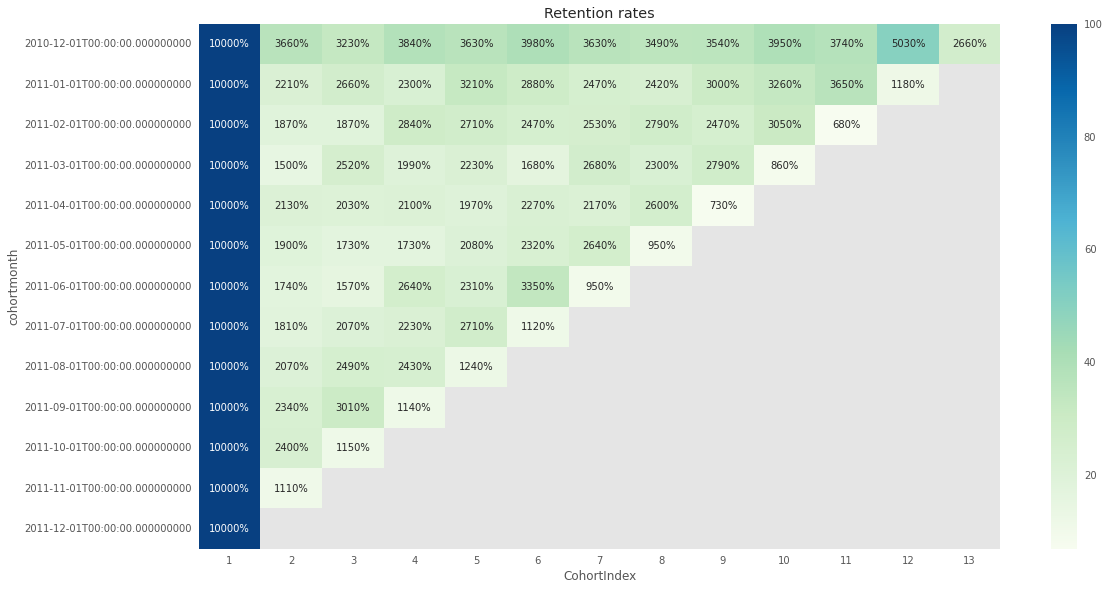

In [219]:
plt.figure(figsize = (16, 9))
plt.title('Retention rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', cmap="GnBu")
plt.show()

## <span style="color:#9C27B0; opacity:1"><font size="5">5.5 Create the 2nd Cohort: Average Quantity Sold</font></span> <a id="8.5"></a>

### <span style="color:#19A4E6; opacity:1"><font size="4">5.5.1 Pivot Cohort and Cohort Retention</font></span> <a id="8.5.1"></a>

In [220]:
cohort2 = df_cohort.groupby(['cohortmonth', 'CohortIndex'])['quantity'].mean().reset_index()
cohort2.head()

cohortmonth  CohortIndex  quantity
0  2010-12-01            1    12.117
1  2010-12-01            2    15.670
2  2010-12-01            3    15.726
3  2010-12-01            4    15.931
4  2010-12-01            5    13.625

In [221]:
pivot_cohort2 = cohort2.pivot(index='cohortmonth', columns='CohortIndex', values='quantity').round(1)
pivot_cohort2

CohortIndex     1      2      3      4      5      6      7       8      9   \
cohortmonth                                                                   
2010-12-01  12.100 15.700 15.700 15.900 13.600 14.900 16.100  15.600 18.200   
2011-01-01  17.500 13.500 12.700 15.300 12.800 15.400 15.000  15.000 11.600   
2011-02-01  11.200 13.700 19.000 12.000 12.300 12.300 13.600  13.400 11.000   
2011-03-01  10.000 11.700 13.300 10.100 13.800 13.000 13.500  13.900 11.300   
2011-04-01  10.000 10.400  9.800 11.900 12.000  8.700 10.000   9.700  7.600   
2011-05-01  11.500  9.700 14.200 12.800 11.200  8.800 10.800 113.800    NaN   
2011-06-01  10.700 14.700 10.900 13.700 10.700 10.000  9.500     NaN    NaN   
2011-07-01   9.900 13.800  7.400  8.200  6.200  7.200    NaN     NaN    NaN   
2011-08-01  10.100  6.200  5.400  6.200  7.100    NaN    NaN     NaN    NaN   
2011-09-01  12.100  6.300  8.100  9.000    NaN    NaN    NaN     NaN    NaN   
2011-10-01   9.000  7.300  8.500    NaN    NaN    NaN    NaN     NaN    NaN   
2011-11-01   7.900 10.000    NaN    NaN    NaN    NaN    NaN     NaN    NaN   
2011-12-01  15.200    NaN    NaN    NaN    NaN    NaN    NaN     NaN    NaN   

CohortIndex     10     11     12     13  
cohortmonth                              
2010-12-01  17.700 19.000 13.600 15.400  
2011-01-01  10.600  9.600 10.200    NaN  
2011-02-01  12.400 13.400    NaN    NaN  
2011-03-01   9.700    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN  
2011-05-01     NaN    NaN    NaN    NaN  
2011-06-01     NaN    NaN    NaN    NaN  
2011-07-01     NaN    NaN    NaN    NaN  
2011-08-01     NaN    NaN    NaN    NaN  
2011-09-01     NaN    NaN    NaN    NaN  
2011-10-01     NaN    NaN    NaN    NaN  
2011-11-01     NaN    NaN    NaN    NaN  
2011-12-01     NaN    NaN    NaN    NaN

### <span style="color:#19A4E6; opacity:1"><font size="4">5.5.2 Visualize analysis of cohort 2 using seaborn and matplotlib modules</font></span> <a id="8.5.2"></a>

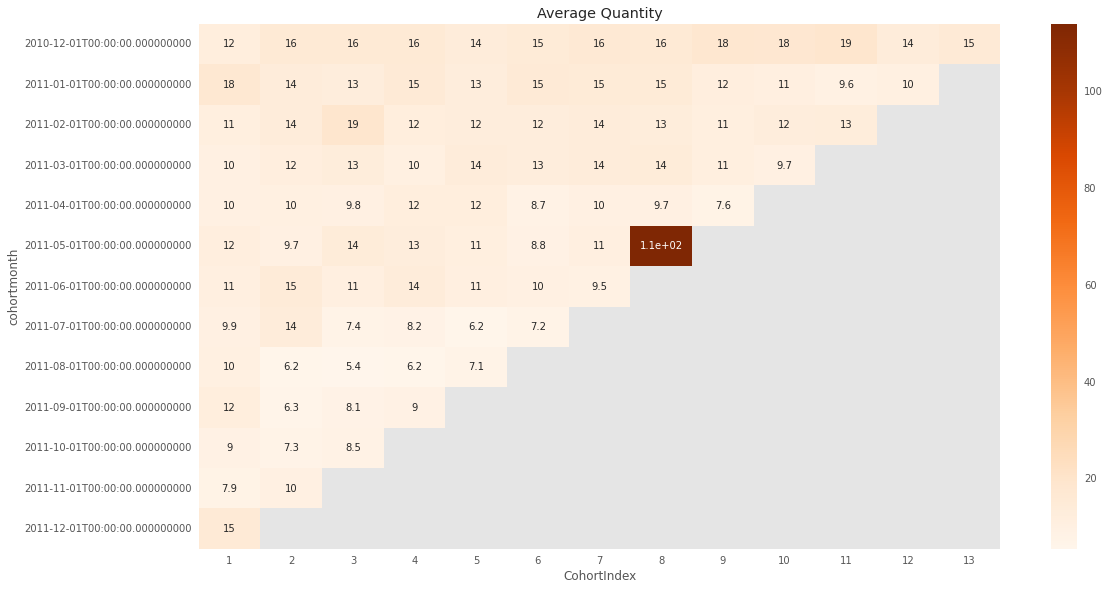

In [222]:
plt.figure(figsize = (16, 9))
plt.title('Average Quantity')
sns.heatmap(data=pivot_cohort2, annot=True, cmap="Oranges")
plt.show()

## <span style="color:#9C27B0; opacity:1"><font size="5">5.6 Create the 3rd Cohort: Average Sales</font></span> <a id="8.6"></a>

### <span style="color:#19A4E6; opacity:1"><font size="4">5.6.1 Pivot Cohort and Cohort Retention</font></span> <a id="8.6.1"></a>

In [223]:
cohort3 = df_cohort.groupby(['cohortmonth', 'CohortIndex'])['total_price'].mean().reset_index()
cohort3.head()

cohortmonth  CohortIndex  total_price
0  2010-12-01            1       22.221
1  2010-12-01            2       27.271
2  2010-12-01            3       26.860
3  2010-12-01            4       27.189
4  2010-12-01            5       21.192

In [224]:
pivot_cohort3 = cohort3.pivot(index='cohortmonth', columns='CohortIndex', values='total_price').round(1)
pivot_cohort3.head()

CohortIndex     1      2      3      4      5      6      7      8      9   \
cohortmonth                                                                  
2010-12-01  22.200 27.300 26.900 27.200 21.200 28.100 28.300 27.400 29.300   
2011-01-01  26.900 25.100 21.000 31.200 22.500 26.300 25.200 25.500 19.100   
2011-02-01  17.900 20.800 21.500 19.400 17.700 17.000 22.200 22.900 18.800   
2011-03-01  17.600 21.100 22.700 18.000 21.100 19.000 22.000 20.000 16.800   
2011-04-01  17.000 21.000 19.500 18.700 19.500 15.000 15.300 16.000 12.300   

CohortIndex     10     11     12     13  
cohortmonth                              
2010-12-01  33.500 34.000 23.600 25.800  
2011-01-01  22.300 19.700 19.800    NaN  
2011-02-01  22.200 23.500    NaN    NaN  
2011-03-01  13.200    NaN    NaN    NaN  
2011-04-01     NaN    NaN    NaN    NaN

### <span style="color:#19A4E6; opacity:1"><font size="4">5.6.2 Visualize analysis of cohort 3 using seaborn and matplotlib modules</font></span> <a id="8.6.2"></a>

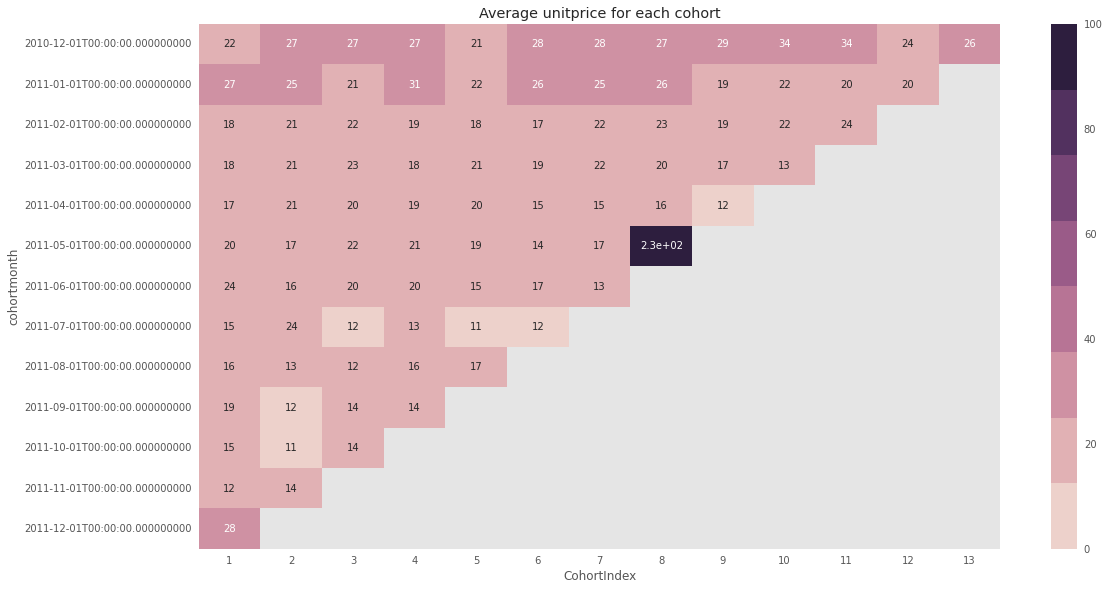

In [225]:
plt.figure(figsize = (16, 9))
plt.title('Average unitprice for each cohort')
sns.heatmap(data=pivot_cohort3 ,annot = True, vmin = 0.0, vmax =100,cmap=sns.cubehelix_palette(8))
plt.show()

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">6. Conclusion</font></span> <a id="9"></a>

For e-commerce organizations, cohort analysis provides a tremendous opportunity to find out which customers are most valuable to their business. Cohort analysis is the best way to obtain answers to the following questions:

- How effective was a marketing campaign conducted in a given time frame?
- Has the strategy implemented to improve customers' conversion rates work?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Which marketing channels bring me the best results?
- Is there a seasonality pattern in customer behavior?

# <span style="color:LightCoral; background-color:#F5EEF8"><font size="6">7. References</font></span> <a id="10"></a>

- [LinkedIn](https://www.linkedin.com/in/emirhan-bozdogan/)
- [Kaggle](https://www.kaggle.com/emrhn1031)
- [GitHub](https://github.com/emir1031)
- [Career Karma](https://careerkarma.com/profile/ckwspn94d145393876obwft79zug/)<br>
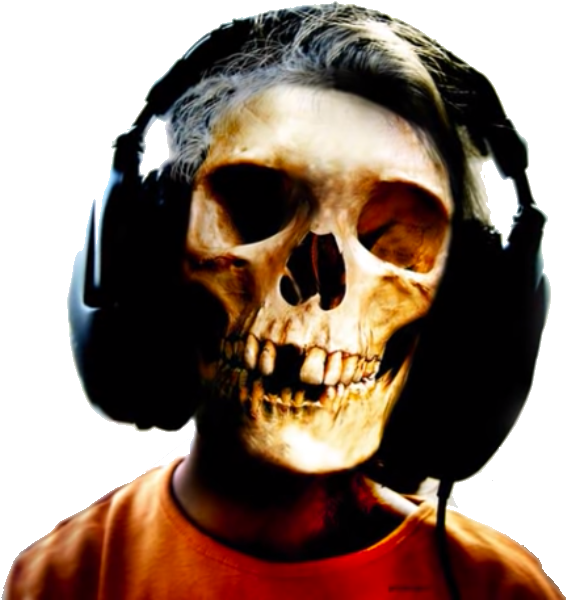